# Semantic Web3 DAO

## Knowledge graph

### Domain: Decentralized Autonomous Organization (DAO)

Creation date: September 2022

Author: Maria-Cruz Valiente


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image
import nxviz as nv

# DAOhaus

## 1. Import data files

In [3]:
# !tar xf datawarehouse/datawarehouse.tar.gz

### 1.1. DAOs

In [4]:
daos_df = pd.read_feather('datawarehouse/daohaus/moloches.arr')
daos_df.head(10)

,network,id,name,version,summoner,summoningTime,timestamp,proposalCount,memberCount,voteCount,rageQuitCount,totalGas,molochAddress
0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,Zaibatsu-DAO,2.1,0x8435d0a8f19f748cba91863b70eb986895ee4b49,1662046800,1662046800,2,1,1,0,25655591000000000,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9
1,arbitrum,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,None,2.1,0x399540044cd5fd63bbc6cbec55a14232f65b457b,1652432312,1652432312,0,1,0,0,4446544408757082,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a
2,arbitrum,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,HIEROPHANT GREEN DAO,2.1,0xbe694be8e812ae1a99443b32041142c36597a772,1651054083,1651054083,0,1,0,0,1473413325719085,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8
3,arbitrum,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,None,2.1,0x0887a7d4ba8ed400f10b651b61ee49afa302c680,1636252707,1636252707,0,1,0,0,25403942773845900,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85
4,arbitrum,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,arb2,2.1,0xefd534f9663e5b4730114c4e0abb8001654c14bf,1657739577,1657739577,0,1,0,0,1005106271075452,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc
5,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,Cats DAO,2.1,0x54c375c481f95ba43e2cecd6ef30631f55518f57,1642251552,1642251552,3,1,0,0,28484693152238614,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9
6,arbitrum,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb,Arbys DAO,2.1,0x68d36dcbdd7bbf206e27134f28103abe7cf972df,1632432777,1632432777,0,1,0,1,13748669410051214,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb
7,arbitrum,0x19b2b6c740884f34674c8fdf7072311703c34232,None,2.1,0x5d6a0c304097e0ef19291f57fd63d5151dc1fdb0,1657477150,1657477150,0,1,0,0,571812756427792,0x19b2b6c740884f34674c8fdf7072311703c34232
8,arbitrum,0x1f30892dfbb665decf10d1ad9e183037d088f803,None,2.1,0x8888888884d2e4e981023da51b43066461f46dca,1651156409,1651156409,0,1,0,0,1497434579148272,0x1f30892dfbb665decf10d1ad9e183037d088f803
9,arbitrum,0x207f9f27126e75fe48b577010078b1308d573069,None,2.1,0x4695a3ecde63ec9027733f3f63aa241b3d5f3095,1632440950,1632440950,0,12,0,0,31684390476700820,0x207f9f27126e75fe48b577010078b1308d573069


In [5]:
daos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3324 entries, 0 to 3323
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   network        3324 non-null   object
 1   id             3324 non-null   object
 2   name           2632 non-null   object
 3   version        3324 non-null   object
 4   summoner       3324 non-null   object
 5   summoningTime  3324 non-null   object
 6   timestamp      3324 non-null   object
 7   proposalCount  3324 non-null   object
 8   memberCount    3324 non-null   object
 9   voteCount      3324 non-null   object
 10  rageQuitCount  3324 non-null   object
 11  totalGas       3324 non-null   object
 12  molochAddress  3324 non-null   object
dtypes: object(13)
memory usage: 337.7+ KB


In [6]:
# Create new field "createAt": Convert to date the field "timestamp".
daos_df['createdAt'] = pd.to_datetime(daos_df['timestamp'], unit='s')
daos_df.head()

,network,id,name,version,summoner,summoningTime,timestamp,proposalCount,memberCount,voteCount,rageQuitCount,totalGas,molochAddress,createdAt
0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,Zaibatsu-DAO,2.1,0x8435d0a8f19f748cba91863b70eb986895ee4b49,1662046800,1662046800,2,1,1,0,25655591000000000,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,2022-09-01 15:40:00
1,arbitrum,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,None,2.1,0x399540044cd5fd63bbc6cbec55a14232f65b457b,1652432312,1652432312,0,1,0,0,4446544408757082,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,2022-05-13 08:58:32
2,arbitrum,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,HIEROPHANT GREEN DAO,2.1,0xbe694be8e812ae1a99443b32041142c36597a772,1651054083,1651054083,0,1,0,0,1473413325719085,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,2022-04-27 10:08:03
3,arbitrum,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,None,2.1,0x0887a7d4ba8ed400f10b651b61ee49afa302c680,1636252707,1636252707,0,1,0,0,25403942773845900,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,2021-11-07 02:38:27
4,arbitrum,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,arb2,2.1,0xefd534f9663e5b4730114c4e0abb8001654c14bf,1657739577,1657739577,0,1,0,0,1005106271075452,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,2022-07-13 19:12:57


In [7]:
daos_df.createdAt.describe()

count                    3324
unique                   3280
top       2021-06-18 11:19:17
freq                        6
first     2019-02-14 08:01:37
last      2022-09-23 07:14:50
Name: createdAt, dtype: object

In [8]:
daos_df.molochAddress.value_counts()

0xf8484b3d9e8189d4743b0ecf35a87c58b76cee7b    2
0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9    1
0x55d2d4c65c649f04b75ad88df3338ff27c39763b    1
0x54d79e4e0094fae50dafe2c0cbd44301ac4e9704    1
0x54e47b9e968b418bbf1aec8193e22322ad8ef5c9    1
                                             ..
0x83aa7000d9fedad0ef78f9f5042a83d6bff727ca    1
0x8486a6fedc34fcb3d3a5a499eb47b63fc0fe513f    1
0x84c5b2ecd49359e6024b0b622369bb0794590794    1
0x84d07b96c1e3eaaf6c2ed878c7abcf6a97c53194    1
0xffe8a8ec2477390c6b97074f44326fac24d7f6dd    1
Name: molochAddress, Length: 3323, dtype: int64

In [9]:
# The same DAO, but in different networks => data error. 
daos_df[daos_df.molochAddress == '0xf8484b3d9e8189d4743b0ecf35a87c58b76cee7b']

,network,id,name,version,summoner,summoningTime,timestamp,proposalCount,memberCount,voteCount,rageQuitCount,totalGas,molochAddress,createdAt
577,mainnet,0xf8484b3d9e8189d4743b0ecf35a87c58b76cee7b,RealQuickDao,2,0xced608aa29bb92185d9b6340adcbfa263dae075b,1594417251,1594417294,0,1,0,0,3512421000000000,0xf8484b3d9e8189d4743b0ecf35a87c58b76cee7b,2020-07-10 21:41:34
3270,xdai,0xf8484b3d9e8189d4743b0ecf35a87c58b76cee7b,RealQuickDao,2,0xced608aa29bb92185d9b6340adcbfa263dae075b,1599065585,1599065630,28,1,19,14,678415684501877253,0xf8484b3d9e8189d4743b0ecf35a87c58b76cee7b,2020-09-02 16:53:50


In [10]:
# Delete one of them in order to clean data.
daos_df.drop(3270, inplace=True)

In [11]:
daos_df[daos_df.molochAddress == '0xf8484b3d9e8189d4743b0ecf35a87c58b76cee7b']

,network,id,name,version,summoner,summoningTime,timestamp,proposalCount,memberCount,voteCount,rageQuitCount,totalGas,molochAddress,createdAt
577,mainnet,0xf8484b3d9e8189d4743b0ecf35a87c58b76cee7b,RealQuickDao,2,0xced608aa29bb92185d9b6340adcbfa263dae075b,1594417251,1594417294,0,1,0,0,3512421000000000,0xf8484b3d9e8189d4743b0ecf35a87c58b76cee7b,2020-07-10 21:41:34


In [12]:
daos_df.reset_index(inplace =True, drop = True)

In [13]:
daos_df.molochAddress.value_counts()

0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9    1
0x55cd67ec877ef72318b56df59a4c287c0a7925d3    1
0x54ba4208a807e74be5d922a19416e5d060de3c87    1
0x54d79e4e0094fae50dafe2c0cbd44301ac4e9704    1
0x54e47b9e968b418bbf1aec8193e22322ad8ef5c9    1
                                             ..
0x83793ef50076ce0400d1ffc4ae6d9cef66b6602d    1
0x83aa7000d9fedad0ef78f9f5042a83d6bff727ca    1
0x8486a6fedc34fcb3d3a5a499eb47b63fc0fe513f    1
0x84c5b2ecd49359e6024b0b622369bb0794590794    1
0xffe8a8ec2477390c6b97074f44326fac24d7f6dd    1
Name: molochAddress, Length: 3323, dtype: int64

In [14]:
daos_df = daos_df[["molochAddress", "name", "network", "createdAt"]]
daos_df.head(10)

,molochAddress,name,network,createdAt
0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,Zaibatsu-DAO,arbitrum,2022-09-01 15:40:00
1,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,None,arbitrum,2022-05-13 08:58:32
2,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,HIEROPHANT GREEN DAO,arbitrum,2022-04-27 10:08:03
3,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,None,arbitrum,2021-11-07 02:38:27
4,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,arb2,arbitrum,2022-07-13 19:12:57
5,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,Cats DAO,arbitrum,2022-01-15 12:59:12
6,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb,Arbys DAO,arbitrum,2021-09-23 21:32:57
7,0x19b2b6c740884f34674c8fdf7072311703c34232,None,arbitrum,2022-07-10 18:19:10
8,0x1f30892dfbb665decf10d1ad9e183037d088f803,None,arbitrum,2022-04-28 14:33:29
9,0x207f9f27126e75fe48b577010078b1308d573069,None,arbitrum,2021-09-23 23:49:10


In [15]:
daos_df.rename(columns = {'molochAddress':'daoAddress', 'network':'networkId'}, inplace = True)
daos_df.head(10)

,daoAddress,name,networkId,createdAt
0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,Zaibatsu-DAO,arbitrum,2022-09-01 15:40:00
1,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,None,arbitrum,2022-05-13 08:58:32
2,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,HIEROPHANT GREEN DAO,arbitrum,2022-04-27 10:08:03
3,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,None,arbitrum,2021-11-07 02:38:27
4,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,arb2,arbitrum,2022-07-13 19:12:57
5,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,Cats DAO,arbitrum,2022-01-15 12:59:12
6,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb,Arbys DAO,arbitrum,2021-09-23 21:32:57
7,0x19b2b6c740884f34674c8fdf7072311703c34232,None,arbitrum,2022-07-10 18:19:10
8,0x1f30892dfbb665decf10d1ad9e183037d088f803,None,arbitrum,2022-04-28 14:33:29
9,0x207f9f27126e75fe48b577010078b1308d573069,None,arbitrum,2021-09-23 23:49:10


In [16]:
daos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3323 entries, 0 to 3322
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   daoAddress  3323 non-null   object        
 1   name        2631 non-null   object        
 2   networkId   3323 non-null   object        
 3   createdAt   3323 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 104.0+ KB


In [17]:
# Replace null names with the term "Unknown".
daos_df["name"].fillna("Unknown", inplace = True)
daos_df.head(10)

,daoAddress,name,networkId,createdAt
0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,Zaibatsu-DAO,arbitrum,2022-09-01 15:40:00
1,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,Unknown,arbitrum,2022-05-13 08:58:32
2,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,HIEROPHANT GREEN DAO,arbitrum,2022-04-27 10:08:03
3,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,Unknown,arbitrum,2021-11-07 02:38:27
4,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,arb2,arbitrum,2022-07-13 19:12:57
5,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,Cats DAO,arbitrum,2022-01-15 12:59:12
6,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb,Arbys DAO,arbitrum,2021-09-23 21:32:57
7,0x19b2b6c740884f34674c8fdf7072311703c34232,Unknown,arbitrum,2022-07-10 18:19:10
8,0x1f30892dfbb665decf10d1ad9e183037d088f803,Unknown,arbitrum,2022-04-28 14:33:29
9,0x207f9f27126e75fe48b577010078b1308d573069,Unknown,arbitrum,2021-09-23 23:49:10


### 1.2. Members

In [18]:
dao_members_df = pd.read_feather('datawarehouse/daohaus/members.arr')
dao_members_df.head(10)

,network,id,createdAt,molochAddress,memberAddress,shares,loot,exists,didRagequit
0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-mem...,1662046800,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,1,0,True,False
1,arbitrum,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a-mem...,1652432312,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,0x399540044cd5fd63bbc6cbec55a14232f65b457b,1,0,True,False
2,arbitrum,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8-mem...,1651054083,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,0xbe694be8e812ae1a99443b32041142c36597a772,1,0,True,False
3,arbitrum,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85-mem...,1636252707,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,0x0887a7d4ba8ed400f10b651b61ee49afa302c680,10,0,True,False
4,arbitrum,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc-mem...,1657739577,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,0xefd534f9663e5b4730114c4e0abb8001654c14bf,1,0,True,False
5,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-mem...,1642251552,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,500000,0,True,False
6,arbitrum,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb-mem...,1632432777,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb,0x68d36dcbdd7bbf206e27134f28103abe7cf972df,1,0,True,False
7,arbitrum,0x19b2b6c740884f34674c8fdf7072311703c34232-mem...,1657477150,0x19b2b6c740884f34674c8fdf7072311703c34232,0x5d6a0c304097e0ef19291f57fd63d5151dc1fdb0,1,0,True,False
8,arbitrum,0x1f30892dfbb665decf10d1ad9e183037d088f803-mem...,1651156409,0x1f30892dfbb665decf10d1ad9e183037d088f803,0x8888888884d2e4e981023da51b43066461f46dca,1,0,True,False
9,arbitrum,0x207f9f27126e75fe48b577010078b1308d573069-mem...,1632440950,0x207f9f27126e75fe48b577010078b1308d573069,0x25680cb25bb2946623540a773e1c4253496a0ec7,10,0,True,False


In [19]:
dao_members_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23712 entries, 0 to 23711
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   network        23712 non-null  object
 1   id             23712 non-null  object
 2   createdAt      23712 non-null  object
 3   molochAddress  23712 non-null  object
 4   memberAddress  23712 non-null  object
 5   shares         23712 non-null  object
 6   loot           23712 non-null  object
 7   exists         23712 non-null  bool  
 8   didRagequit    23712 non-null  bool  
dtypes: bool(2), object(7)
memory usage: 1.3+ MB


In [20]:
dao_members_df['createdAt'] = pd.to_datetime(dao_members_df['createdAt'], unit='s')
dao_members_df.head()

,network,id,createdAt,molochAddress,memberAddress,shares,loot,exists,didRagequit
0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-mem...,2022-09-01 15:40:00,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,1,0,True,False
1,arbitrum,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a-mem...,2022-05-13 08:58:32,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,0x399540044cd5fd63bbc6cbec55a14232f65b457b,1,0,True,False
2,arbitrum,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8-mem...,2022-04-27 10:08:03,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,0xbe694be8e812ae1a99443b32041142c36597a772,1,0,True,False
3,arbitrum,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85-mem...,2021-11-07 02:38:27,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,0x0887a7d4ba8ed400f10b651b61ee49afa302c680,10,0,True,False
4,arbitrum,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc-mem...,2022-07-13 19:12:57,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,0xefd534f9663e5b4730114c4e0abb8001654c14bf,1,0,True,False


In [21]:
# Only members that are in the DAOs.
dao_members_df = dao_members_df[dao_members_df['molochAddress'].isin(daos_df['daoAddress'])]
dao_members_df.reset_index(inplace =True, drop = True)
dao_members_df.head(10)

,network,id,createdAt,molochAddress,memberAddress,shares,loot,exists,didRagequit
0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-mem...,2022-09-01 15:40:00,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,1,0,True,False
1,arbitrum,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a-mem...,2022-05-13 08:58:32,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,0x399540044cd5fd63bbc6cbec55a14232f65b457b,1,0,True,False
2,arbitrum,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8-mem...,2022-04-27 10:08:03,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,0xbe694be8e812ae1a99443b32041142c36597a772,1,0,True,False
3,arbitrum,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85-mem...,2021-11-07 02:38:27,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,0x0887a7d4ba8ed400f10b651b61ee49afa302c680,10,0,True,False
4,arbitrum,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc-mem...,2022-07-13 19:12:57,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,0xefd534f9663e5b4730114c4e0abb8001654c14bf,1,0,True,False
5,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-mem...,2022-01-15 12:59:12,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,500000,0,True,False
6,arbitrum,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb-mem...,2021-09-23 21:32:57,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb,0x68d36dcbdd7bbf206e27134f28103abe7cf972df,1,0,True,False
7,arbitrum,0x19b2b6c740884f34674c8fdf7072311703c34232-mem...,2022-07-10 18:19:10,0x19b2b6c740884f34674c8fdf7072311703c34232,0x5d6a0c304097e0ef19291f57fd63d5151dc1fdb0,1,0,True,False
8,arbitrum,0x1f30892dfbb665decf10d1ad9e183037d088f803-mem...,2022-04-28 14:33:29,0x1f30892dfbb665decf10d1ad9e183037d088f803,0x8888888884d2e4e981023da51b43066461f46dca,1,0,True,False
9,arbitrum,0x207f9f27126e75fe48b577010078b1308d573069-mem...,2021-09-23 23:49:10,0x207f9f27126e75fe48b577010078b1308d573069,0x25680cb25bb2946623540a773e1c4253496a0ec7,10,0,True,False


In [22]:
# Create a new column in order to know is a member has left the DAO.
dao_members_df['isActive'] = ~dao_members_df['didRagequit']
dao_members_df.head(10)

,network,id,createdAt,molochAddress,memberAddress,shares,loot,exists,didRagequit,isActive
0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-mem...,2022-09-01 15:40:00,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,1,0,True,False,True
1,arbitrum,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a-mem...,2022-05-13 08:58:32,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,0x399540044cd5fd63bbc6cbec55a14232f65b457b,1,0,True,False,True
2,arbitrum,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8-mem...,2022-04-27 10:08:03,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,0xbe694be8e812ae1a99443b32041142c36597a772,1,0,True,False,True
3,arbitrum,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85-mem...,2021-11-07 02:38:27,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,0x0887a7d4ba8ed400f10b651b61ee49afa302c680,10,0,True,False,True
4,arbitrum,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc-mem...,2022-07-13 19:12:57,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,0xefd534f9663e5b4730114c4e0abb8001654c14bf,1,0,True,False,True
5,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-mem...,2022-01-15 12:59:12,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,500000,0,True,False,True
6,arbitrum,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb-mem...,2021-09-23 21:32:57,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb,0x68d36dcbdd7bbf206e27134f28103abe7cf972df,1,0,True,False,True
7,arbitrum,0x19b2b6c740884f34674c8fdf7072311703c34232-mem...,2022-07-10 18:19:10,0x19b2b6c740884f34674c8fdf7072311703c34232,0x5d6a0c304097e0ef19291f57fd63d5151dc1fdb0,1,0,True,False,True
8,arbitrum,0x1f30892dfbb665decf10d1ad9e183037d088f803-mem...,2022-04-28 14:33:29,0x1f30892dfbb665decf10d1ad9e183037d088f803,0x8888888884d2e4e981023da51b43066461f46dca,1,0,True,False,True
9,arbitrum,0x207f9f27126e75fe48b577010078b1308d573069-mem...,2021-09-23 23:49:10,0x207f9f27126e75fe48b577010078b1308d573069,0x25680cb25bb2946623540a773e1c4253496a0ec7,10,0,True,False,True


In [23]:
dao_members_df = dao_members_df[["memberAddress", "molochAddress", "shares", "loot", "isActive", "createdAt"]]
dao_members_df.head(10)

,memberAddress,molochAddress,shares,loot,isActive,createdAt
0,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,1,0,True,2022-09-01 15:40:00
1,0x399540044cd5fd63bbc6cbec55a14232f65b457b,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,1,0,True,2022-05-13 08:58:32
2,0xbe694be8e812ae1a99443b32041142c36597a772,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,1,0,True,2022-04-27 10:08:03
3,0x0887a7d4ba8ed400f10b651b61ee49afa302c680,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,10,0,True,2021-11-07 02:38:27
4,0xefd534f9663e5b4730114c4e0abb8001654c14bf,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,1,0,True,2022-07-13 19:12:57
5,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,500000,0,True,2022-01-15 12:59:12
6,0x68d36dcbdd7bbf206e27134f28103abe7cf972df,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb,1,0,True,2021-09-23 21:32:57
7,0x5d6a0c304097e0ef19291f57fd63d5151dc1fdb0,0x19b2b6c740884f34674c8fdf7072311703c34232,1,0,True,2022-07-10 18:19:10
8,0x8888888884d2e4e981023da51b43066461f46dca,0x1f30892dfbb665decf10d1ad9e183037d088f803,1,0,True,2022-04-28 14:33:29
9,0x25680cb25bb2946623540a773e1c4253496a0ec7,0x207f9f27126e75fe48b577010078b1308d573069,10,0,True,2021-09-23 23:49:10


In [24]:
dao_members_df.rename(columns = {'molochAddress':'daoAddress'}, inplace = True)
dao_members_df.head(10)

,memberAddress,daoAddress,shares,loot,isActive,createdAt
0,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,1,0,True,2022-09-01 15:40:00
1,0x399540044cd5fd63bbc6cbec55a14232f65b457b,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,1,0,True,2022-05-13 08:58:32
2,0xbe694be8e812ae1a99443b32041142c36597a772,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,1,0,True,2022-04-27 10:08:03
3,0x0887a7d4ba8ed400f10b651b61ee49afa302c680,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,10,0,True,2021-11-07 02:38:27
4,0xefd534f9663e5b4730114c4e0abb8001654c14bf,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,1,0,True,2022-07-13 19:12:57
5,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,500000,0,True,2022-01-15 12:59:12
6,0x68d36dcbdd7bbf206e27134f28103abe7cf972df,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb,1,0,True,2021-09-23 21:32:57
7,0x5d6a0c304097e0ef19291f57fd63d5151dc1fdb0,0x19b2b6c740884f34674c8fdf7072311703c34232,1,0,True,2022-07-10 18:19:10
8,0x8888888884d2e4e981023da51b43066461f46dca,0x1f30892dfbb665decf10d1ad9e183037d088f803,1,0,True,2022-04-28 14:33:29
9,0x25680cb25bb2946623540a773e1c4253496a0ec7,0x207f9f27126e75fe48b577010078b1308d573069,10,0,True,2021-09-23 23:49:10


In [25]:
dao_members_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23712 entries, 0 to 23711
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   memberAddress  23712 non-null  object        
 1   daoAddress     23712 non-null  object        
 2   shares         23712 non-null  object        
 3   loot           23712 non-null  object        
 4   isActive       23712 non-null  bool          
 5   createdAt      23712 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 949.5+ KB


### 1.3. Proposals

In [26]:
dao_proposals_df = pd.read_feather('datawarehouse/daohaus/proposals.arr')
dao_proposals_df.head(10)

,network,id,createdAt,proposalId,molochAddress,memberAddress,proposer,sponsor,sharesRequested,lootRequested,...,paymentRequested,yesVotes,noVotes,sponsored,sponsoredAt,processed,processedAt,didPass,yesShares,noShares
0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,1662047614,0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x0000000000000000000000000000000000000000,50,0,...,0,0,0,False,None,False,None,False,0,0
1,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,1662048470,1,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,50,0,...,0,1,0,True,1662048521,False,None,False,1,0
2,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,1642252357,0,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,0,0,...,0,0,0,False,None,False,None,False,0,0
3,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,1642252710,1,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,1,0,...,0,0,0,False,None,False,None,False,0,0
4,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,1642253135,2,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,10,0,...,0,0,0,False,None,False,None,False,0,0
5,arbitrum,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265-pro...,1650425410,0,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0,1,...,0,0,0,True,1650425518,False,None,False,0,0
6,arbitrum,0x47839e5373cd204f96d49d3a253c0433a2a5f038-pro...,1637591513,0,0x47839e5373cd204f96d49d3a253c0433a2a5f038,0x196e919f74baeafca10c313043848c39a8f5effd,0x196e919f74baeafca10c313043848c39a8f5effd,0x196e919f74baeafca10c313043848c39a8f5effd,0,0,...,0,0,0,True,1637591557,True,1643906781,False,0,0
7,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,1635889918,0,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x0000000000000000000000000000000000000000,500000,0,...,0,0,0,False,None,False,None,False,0,0
8,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,1636738835,1,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0,0,...,0,2,1,True,1636738835,True,1638323151,True,10000000,5000000
9,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,1638061310,2,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x0000000000000000000000000000000000000000,0xd73da7851d9571668752bee97fd6aa6656abba26,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,0,0,...,0,1,0,True,1638096921,True,1638983693,True,5000000,0


In [27]:
dao_proposals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45458 entries, 0 to 45457
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   network           45458 non-null  object
 1   id                45458 non-null  object
 2   createdAt         45458 non-null  object
 3   proposalId        45458 non-null  object
 4   molochAddress     45458 non-null  object
 5   memberAddress     45458 non-null  object
 6   proposer          45458 non-null  object
 7   sponsor           45458 non-null  object
 8   sharesRequested   45458 non-null  object
 9   lootRequested     45458 non-null  object
 10  tributeOffered    45458 non-null  object
 11  paymentRequested  45458 non-null  object
 12  yesVotes          45458 non-null  object
 13  noVotes           45458 non-null  object
 14  sponsored         45458 non-null  bool  
 15  sponsoredAt       18579 non-null  object
 16  processed         45458 non-null  bool  
 17  processedAt 

In [28]:
dao_proposals_df['createdAt'] = pd.to_datetime(dao_proposals_df['createdAt'], unit='s')
dao_proposals_df.head(10)

,network,id,createdAt,proposalId,molochAddress,memberAddress,proposer,sponsor,sharesRequested,lootRequested,...,paymentRequested,yesVotes,noVotes,sponsored,sponsoredAt,processed,processedAt,didPass,yesShares,noShares
0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,2022-09-01 15:53:34,0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x0000000000000000000000000000000000000000,50,0,...,0,0,0,False,None,False,None,False,0,0
1,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,2022-09-01 16:07:50,1,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,50,0,...,0,1,0,True,1662048521,False,None,False,1,0
2,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2022-01-15 13:12:37,0,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,0,0,...,0,0,0,False,None,False,None,False,0,0
3,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2022-01-15 13:18:30,1,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,1,0,...,0,0,0,False,None,False,None,False,0,0
4,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2022-01-15 13:25:35,2,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,10,0,...,0,0,0,False,None,False,None,False,0,0
5,arbitrum,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265-pro...,2022-04-20 03:30:10,0,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0,1,...,0,0,0,True,1650425518,False,None,False,0,0
6,arbitrum,0x47839e5373cd204f96d49d3a253c0433a2a5f038-pro...,2021-11-22 14:31:53,0,0x47839e5373cd204f96d49d3a253c0433a2a5f038,0x196e919f74baeafca10c313043848c39a8f5effd,0x196e919f74baeafca10c313043848c39a8f5effd,0x196e919f74baeafca10c313043848c39a8f5effd,0,0,...,0,0,0,True,1637591557,True,1643906781,False,0,0
7,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,2021-11-02 21:51:58,0,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x0000000000000000000000000000000000000000,500000,0,...,0,0,0,False,None,False,None,False,0,0
8,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,2021-11-12 17:40:35,1,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0,0,...,0,2,1,True,1636738835,True,1638323151,True,10000000,5000000
9,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,2021-11-28 01:01:50,2,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x0000000000000000000000000000000000000000,0xd73da7851d9571668752bee97fd6aa6656abba26,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,0,0,...,0,1,0,True,1638096921,True,1638983693,True,5000000,0


In [29]:
# Only proposals from the selected DAOs.
dao_proposals_df = dao_proposals_df[dao_proposals_df['molochAddress'].isin(daos_df['daoAddress'])]
dao_proposals_df.reset_index(inplace =True, drop = True)
dao_proposals_df.head(10)

,network,id,createdAt,proposalId,molochAddress,memberAddress,proposer,sponsor,sharesRequested,lootRequested,...,paymentRequested,yesVotes,noVotes,sponsored,sponsoredAt,processed,processedAt,didPass,yesShares,noShares
0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,2022-09-01 15:53:34,0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x0000000000000000000000000000000000000000,50,0,...,0,0,0,False,None,False,None,False,0,0
1,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,2022-09-01 16:07:50,1,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,50,0,...,0,1,0,True,1662048521,False,None,False,1,0
2,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2022-01-15 13:12:37,0,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,0,0,...,0,0,0,False,None,False,None,False,0,0
3,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2022-01-15 13:18:30,1,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,1,0,...,0,0,0,False,None,False,None,False,0,0
4,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2022-01-15 13:25:35,2,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,10,0,...,0,0,0,False,None,False,None,False,0,0
5,arbitrum,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265-pro...,2022-04-20 03:30:10,0,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0,1,...,0,0,0,True,1650425518,False,None,False,0,0
6,arbitrum,0x47839e5373cd204f96d49d3a253c0433a2a5f038-pro...,2021-11-22 14:31:53,0,0x47839e5373cd204f96d49d3a253c0433a2a5f038,0x196e919f74baeafca10c313043848c39a8f5effd,0x196e919f74baeafca10c313043848c39a8f5effd,0x196e919f74baeafca10c313043848c39a8f5effd,0,0,...,0,0,0,True,1637591557,True,1643906781,False,0,0
7,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,2021-11-02 21:51:58,0,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x0000000000000000000000000000000000000000,500000,0,...,0,0,0,False,None,False,None,False,0,0
8,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,2021-11-12 17:40:35,1,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0,0,...,0,2,1,True,1636738835,True,1638323151,True,10000000,5000000
9,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,2021-11-28 01:01:50,2,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x0000000000000000000000000000000000000000,0xd73da7851d9571668752bee97fd6aa6656abba26,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,0,0,...,0,1,0,True,1638096921,True,1638983693,True,5000000,0


In [30]:
dao_proposals_df.createdAt.describe(datetime_is_numeric=True)

count                            45458
mean     2021-09-30 04:29:46.684236032
min                2019-02-15 01:58:05
25%      2021-10-26 12:45:28.750000128
50%                2021-10-30 03:43:45
75%      2021-11-15 05:00:31.249999872
max                2022-09-24 00:28:23
Name: createdAt, dtype: object

In [31]:
dao_proposals_df['processedAt'] = pd.to_datetime(dao_proposals_df['processedAt'], unit='s')
dao_proposals_df.head(10)

,network,id,createdAt,proposalId,molochAddress,memberAddress,proposer,sponsor,sharesRequested,lootRequested,...,paymentRequested,yesVotes,noVotes,sponsored,sponsoredAt,processed,processedAt,didPass,yesShares,noShares
0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,2022-09-01 15:53:34,0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x0000000000000000000000000000000000000000,50,0,...,0,0,0,False,None,False,NaT,False,0,0
1,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,2022-09-01 16:07:50,1,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,50,0,...,0,1,0,True,1662048521,False,NaT,False,1,0
2,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2022-01-15 13:12:37,0,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,0,0,...,0,0,0,False,None,False,NaT,False,0,0
3,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2022-01-15 13:18:30,1,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,1,0,...,0,0,0,False,None,False,NaT,False,0,0
4,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2022-01-15 13:25:35,2,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,10,0,...,0,0,0,False,None,False,NaT,False,0,0
5,arbitrum,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265-pro...,2022-04-20 03:30:10,0,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0,1,...,0,0,0,True,1650425518,False,NaT,False,0,0
6,arbitrum,0x47839e5373cd204f96d49d3a253c0433a2a5f038-pro...,2021-11-22 14:31:53,0,0x47839e5373cd204f96d49d3a253c0433a2a5f038,0x196e919f74baeafca10c313043848c39a8f5effd,0x196e919f74baeafca10c313043848c39a8f5effd,0x196e919f74baeafca10c313043848c39a8f5effd,0,0,...,0,0,0,True,1637591557,True,2022-02-03 16:46:21,False,0,0
7,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,2021-11-02 21:51:58,0,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x0000000000000000000000000000000000000000,500000,0,...,0,0,0,False,None,False,NaT,False,0,0
8,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,2021-11-12 17:40:35,1,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0,0,...,0,2,1,True,1636738835,True,2021-12-01 01:45:51,True,10000000,5000000
9,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,2021-11-28 01:01:50,2,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x0000000000000000000000000000000000000000,0xd73da7851d9571668752bee97fd6aa6656abba26,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,0,0,...,0,1,0,True,1638096921,True,2021-12-08 17:14:53,True,5000000,0


In [32]:
dao_proposals_df = dao_proposals_df[["id", "proposalId", "proposer", "sponsor", "molochAddress", 
                                     "paymentRequested", "processed", "processedAt", "yesVotes", "noVotes",
                                     "didPass", "createdAt"]]
dao_proposals_df.head(10)

,id,proposalId,proposer,sponsor,molochAddress,paymentRequested,processed,processedAt,yesVotes,noVotes,didPass,createdAt
0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,0,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x0000000000000000000000000000000000000000,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0,False,NaT,0,0,False,2022-09-01 15:53:34
1,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,1,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0,False,NaT,1,0,False,2022-09-01 16:07:50
2,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,0,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:12:37
3,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,1,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:18:30
4,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:25:35
5,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265-pro...,0,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,0,False,NaT,0,0,False,2022-04-20 03:30:10
6,0x47839e5373cd204f96d49d3a253c0433a2a5f038-pro...,0,0x196e919f74baeafca10c313043848c39a8f5effd,0x196e919f74baeafca10c313043848c39a8f5effd,0x47839e5373cd204f96d49d3a253c0433a2a5f038,0,True,2022-02-03 16:46:21,0,0,False,2021-11-22 14:31:53
7,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x0000000000000000000000000000000000000000,0x751eda5aa0a1c026f51942e266ed82795428ae34,0,False,NaT,0,0,False,2021-11-02 21:51:58
8,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,1,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x751eda5aa0a1c026f51942e266ed82795428ae34,0,True,2021-12-01 01:45:51,2,1,True,2021-11-12 17:40:35
9,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,2,0xd73da7851d9571668752bee97fd6aa6656abba26,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,0x751eda5aa0a1c026f51942e266ed82795428ae34,0,True,2021-12-08 17:14:53,1,0,True,2021-11-28 01:01:50


In [33]:
dao_proposals_df.rename(columns = {'molochAddress':'daoAddress', 'proposalId':'proposalCode', 
                                   'id':'proposalId', 'sponsor': 'responsibleMember'}, inplace = True)
dao_proposals_df.head(10)

,proposalId,proposalCode,proposer,responsibleMember,daoAddress,paymentRequested,processed,processedAt,yesVotes,noVotes,didPass,createdAt
0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,0,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x0000000000000000000000000000000000000000,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0,False,NaT,0,0,False,2022-09-01 15:53:34
1,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,1,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0,False,NaT,1,0,False,2022-09-01 16:07:50
2,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,0,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:12:37
3,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,1,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:18:30
4,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:25:35
5,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265-pro...,0,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,0,False,NaT,0,0,False,2022-04-20 03:30:10
6,0x47839e5373cd204f96d49d3a253c0433a2a5f038-pro...,0,0x196e919f74baeafca10c313043848c39a8f5effd,0x196e919f74baeafca10c313043848c39a8f5effd,0x47839e5373cd204f96d49d3a253c0433a2a5f038,0,True,2022-02-03 16:46:21,0,0,False,2021-11-22 14:31:53
7,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x0000000000000000000000000000000000000000,0x751eda5aa0a1c026f51942e266ed82795428ae34,0,False,NaT,0,0,False,2021-11-02 21:51:58
8,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,1,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x751eda5aa0a1c026f51942e266ed82795428ae34,0,True,2021-12-01 01:45:51,2,1,True,2021-11-12 17:40:35
9,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,2,0xd73da7851d9571668752bee97fd6aa6656abba26,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,0x751eda5aa0a1c026f51942e266ed82795428ae34,0,True,2021-12-08 17:14:53,1,0,True,2021-11-28 01:01:50


In [34]:
dao_proposals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45458 entries, 0 to 45457
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   proposalId         45458 non-null  object        
 1   proposalCode       45458 non-null  object        
 2   proposer           45458 non-null  object        
 3   responsibleMember  45458 non-null  object        
 4   daoAddress         45458 non-null  object        
 5   paymentRequested   45458 non-null  object        
 6   processed          45458 non-null  bool          
 7   processedAt        17368 non-null  datetime64[ns]
 8   yesVotes           45458 non-null  object        
 9   noVotes            45458 non-null  object        
 10  didPass            45458 non-null  bool          
 11  createdAt          45458 non-null  datetime64[ns]
dtypes: bool(2), datetime64[ns](2), object(8)
memory usage: 3.6+ MB


In [35]:
# Only select the proposals of the last year.
dao_proposals_df = dao_proposals_df[dao_proposals_df.createdAt.between('2021-09-01', '2022-09-01')]
dao_proposals_df.reset_index(inplace = True, drop = True)
dao_proposals_df.head(10)

,proposalId,proposalCode,proposer,responsibleMember,daoAddress,paymentRequested,processed,processedAt,yesVotes,noVotes,didPass,createdAt
0,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,0,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:12:37
1,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,1,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:18:30
2,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:25:35
3,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265-pro...,0,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,0,False,NaT,0,0,False,2022-04-20 03:30:10
4,0x47839e5373cd204f96d49d3a253c0433a2a5f038-pro...,0,0x196e919f74baeafca10c313043848c39a8f5effd,0x196e919f74baeafca10c313043848c39a8f5effd,0x47839e5373cd204f96d49d3a253c0433a2a5f038,0,True,2022-02-03 16:46:21,0,0,False,2021-11-22 14:31:53
5,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x0000000000000000000000000000000000000000,0x751eda5aa0a1c026f51942e266ed82795428ae34,0,False,NaT,0,0,False,2021-11-02 21:51:58
6,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,1,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x751eda5aa0a1c026f51942e266ed82795428ae34,0,True,2021-12-01 01:45:51,2,1,True,2021-11-12 17:40:35
7,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,2,0xd73da7851d9571668752bee97fd6aa6656abba26,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,0x751eda5aa0a1c026f51942e266ed82795428ae34,0,True,2021-12-08 17:14:53,1,0,True,2021-11-28 01:01:50
8,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,3,0xd73da7851d9571668752bee97fd6aa6656abba26,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x751eda5aa0a1c026f51942e266ed82795428ae34,0,True,2021-12-08 17:17:15,1,0,True,2021-12-02 10:54:27
9,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,4,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x751eda5aa0a1c026f51942e266ed82795428ae34,0,True,2022-01-19 12:20:16,1,0,True,2021-12-13 07:59:37


In [36]:
dao_proposals_df.shape

(36764, 12)

In [37]:
dao_proposals_df.createdAt.describe()

count                   36764
unique                  22671
top       2021-10-28 15:31:25
freq                       45
first     2021-09-01 00:36:30
last      2022-08-31 20:28:30
Name: createdAt, dtype: object

In [38]:
# Discard DAOs that are not in the new DAO list with proposals in the last year.
daos_df = daos_df[daos_df['daoAddress'].isin(dao_proposals_df['daoAddress'])]
daos_df.reset_index(inplace = True, drop = True)
daos_df.head(10)

,daoAddress,name,networkId,createdAt
0,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,Cats DAO,arbitrum,2022-01-15 12:59:12
1,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,Space Crew,arbitrum,2022-04-17 20:19:22
2,0x47839e5373cd204f96d49d3a253c0433a2a5f038,CTRL (arbitrum),arbitrum,2021-11-22 14:19:53
3,0x751eda5aa0a1c026f51942e266ed82795428ae34,Fraktal,arbitrum,2021-11-02 21:41:58
4,0xea9916a3e6a28eca1c551ee3e78737336068395e,MC NFT Arboretum,arbitrum,2021-11-09 22:52:33
5,0xefa202ed28b4efbaf835c30a4f1a64ae71078487,BEEF 'N CHEDDAR GUILD,arbitrum,2021-09-14 21:13:24
6,0xefb3641761195a55a214dd43c68e211157c612b0,Test,arbitrum,2022-01-16 23:52:30
7,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d,FOMO NFT DAO,arbitrum,2021-11-17 22:28:24
8,0xfd89d45c88526bf8abe8d9c0bac18c59cab046eb,TEKAC,arbitrum,2021-11-06 21:28:25
9,0x0353b86f1e8dd2d28b6eed6fd9b5cbbdc2df42c5,Equilibrium DAO LLC,mainnet,2021-12-08 10:54:00


In [39]:
daos_df.shape

(945, 4)

In [40]:
# Discard members that are not in the new DAO list with proposals in the last year.
dao_members_df = dao_members_df[dao_members_df['daoAddress'].isin(dao_proposals_df['daoAddress'])]
dao_members_df.reset_index(inplace = True, drop = True)
dao_members_df.head(10)

,memberAddress,daoAddress,shares,loot,isActive,createdAt
0,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,500000,0,True,2022-01-15 12:59:12
1,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,600,0,True,2022-04-17 20:19:22
2,0x17fba501df40e83605d01fbef7f68174537e361a,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,600,0,True,2022-04-17 20:19:22
3,0x85c0fea4a2a6de02a2d51108340cf4f08072d3ff,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,600,0,True,2022-04-17 20:19:22
4,0xa3d7c306e182121e63cb5258b27e35f11f70c4e5,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,600,0,True,2022-04-17 20:19:22
5,0xd7163f80bec05eb32b841fdbd02b8a57fb33ad7d,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,600,0,True,2022-04-17 20:19:22
6,0x196e919f74baeafca10c313043848c39a8f5effd,0x47839e5373cd204f96d49d3a253c0433a2a5f038,1,0,True,2021-11-22 14:19:53
7,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,0x751eda5aa0a1c026f51942e266ed82795428ae34,5000000,0,True,2021-11-02 21:41:58
8,0x6fef3d3226e9da958cc66bcb513db55224e1f1ae,0x751eda5aa0a1c026f51942e266ed82795428ae34,0,5000000,True,2021-11-02 21:41:58
9,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x751eda5aa0a1c026f51942e266ed82795428ae34,5000000,0,True,2021-11-02 21:41:58


In [41]:
dao_members_df.shape

(14935, 6)

### 1.4. Voters

In [42]:
dao_voters_df = pd.read_feather('datawarehouse/daohaus/votes.arr')
dao_voters_df.head(10)

,network,id,createdAt,molochAddress,memberAddress,uintVote,proposalAddress
0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-mem...,1662062323,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,1,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...
1,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,1636740912,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,2,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
2,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,1638118727,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
3,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,1636739724,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
4,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,1638462153,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
5,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,1639447975,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
6,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,1639447975,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
7,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,1639447975,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
8,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,1636740439,0x751eda5aa0a1c026f51942e266ed82795428ae34,0xbc5b552641e5d203f0a6c230aa9dc14da7450053,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
9,arbitrum,0xbca32b1d3fa6777bfb8e6a1f256f40b40aa80668-mem...,1629205347,0xbca32b1d3fa6777bfb8e6a1f256f40b40aa80668,0xced608aa29bb92185d9b6340adcbfa263dae075b,1,0xbca32b1d3fa6777bfb8e6a1f256f40b40aa80668-pro...


In [43]:
dao_voters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45807 entries, 0 to 45806
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   network          45807 non-null  object
 1   id               45807 non-null  object
 2   createdAt        45807 non-null  object
 3   molochAddress    45807 non-null  object
 4   memberAddress    45807 non-null  object
 5   uintVote         45807 non-null  int64 
 6   proposalAddress  45807 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.4+ MB


In [44]:
dao_voters_df['createdAt'] = pd.to_datetime(dao_voters_df['createdAt'], unit='s')
dao_voters_df.head(10)

,network,id,createdAt,molochAddress,memberAddress,uintVote,proposalAddress
0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-mem...,2022-09-01 19:58:43,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,1,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...
1,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-12 18:15:12,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,2,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
2,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-28 16:58:47,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
3,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-12 17:55:24,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
4,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-02 16:22:33,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
5,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-14 02:12:55,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
6,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-14 02:12:55,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
7,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-14 02:12:55,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
8,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-12 18:07:19,0x751eda5aa0a1c026f51942e266ed82795428ae34,0xbc5b552641e5d203f0a6c230aa9dc14da7450053,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
9,arbitrum,0xbca32b1d3fa6777bfb8e6a1f256f40b40aa80668-mem...,2021-08-17 13:02:27,0xbca32b1d3fa6777bfb8e6a1f256f40b40aa80668,0xced608aa29bb92185d9b6340adcbfa263dae075b,1,0xbca32b1d3fa6777bfb8e6a1f256f40b40aa80668-pro...


In [45]:
# Only select votes associated with the proposal list.
dao_voters_df = dao_voters_df[dao_voters_df.proposalAddress.isin(dao_proposals_df["proposalId"])]
dao_voters_df.reset_index(inplace = True, drop = True)
dao_voters_df.head(10)

,network,id,createdAt,molochAddress,memberAddress,uintVote,proposalAddress
0,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-12 18:15:12,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,2,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
1,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-28 16:58:47,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
2,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-12 17:55:24,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
3,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-02 16:22:33,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
4,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-14 02:12:55,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
5,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-14 02:12:55,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
6,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-14 02:12:55,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
7,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-12 18:07:19,0x751eda5aa0a1c026f51942e266ed82795428ae34,0xbc5b552641e5d203f0a6c230aa9dc14da7450053,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
8,arbitrum,0xea9916a3e6a28eca1c551ee3e78737336068395e-mem...,2021-12-10 20:01:42,0xea9916a3e6a28eca1c551ee3e78737336068395e,0x1426fbd146942e153653863cbe633780c17268da,1,0xea9916a3e6a28eca1c551ee3e78737336068395e-pro...
9,arbitrum,0xea9916a3e6a28eca1c551ee3e78737336068395e-mem...,2021-12-10 23:25:14,0xea9916a3e6a28eca1c551ee3e78737336068395e,0x2c3dd65e94f97b2a25239eddffd2e192c08769b8,1,0xea9916a3e6a28eca1c551ee3e78737336068395e-pro...


In [46]:
dao_voters_df.shape

(32135, 7)

In [47]:
dao_voters_df = dao_voters_df[dao_voters_df.molochAddress.isin(dao_proposals_df["daoAddress"])]
dao_voters_df.reset_index(inplace = True, drop = True)
dao_voters_df.head(10)

,network,id,createdAt,molochAddress,memberAddress,uintVote,proposalAddress
0,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-12 18:15:12,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,2,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
1,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-28 16:58:47,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
2,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-12 17:55:24,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
3,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-02 16:22:33,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
4,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-14 02:12:55,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
5,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-14 02:12:55,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
6,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-14 02:12:55,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
7,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-12 18:07:19,0x751eda5aa0a1c026f51942e266ed82795428ae34,0xbc5b552641e5d203f0a6c230aa9dc14da7450053,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
8,arbitrum,0xea9916a3e6a28eca1c551ee3e78737336068395e-mem...,2021-12-10 20:01:42,0xea9916a3e6a28eca1c551ee3e78737336068395e,0x1426fbd146942e153653863cbe633780c17268da,1,0xea9916a3e6a28eca1c551ee3e78737336068395e-pro...
9,arbitrum,0xea9916a3e6a28eca1c551ee3e78737336068395e-mem...,2021-12-10 23:25:14,0xea9916a3e6a28eca1c551ee3e78737336068395e,0x2c3dd65e94f97b2a25239eddffd2e192c08769b8,1,0xea9916a3e6a28eca1c551ee3e78737336068395e-pro...


In [48]:
dao_voters_df.shape

(32135, 7)

In [49]:
# Create a new column in order to know if a member has voted in a proposal.
def member_participation (value):
    if value == 1:
        return True
    else:
        return False

In [50]:
dao_voters_df['hasVoted'] = dao_voters_df['uintVote'].map(member_participation)
dao_voters_df.head(10)

,network,id,createdAt,molochAddress,memberAddress,uintVote,proposalAddress,hasVoted
0,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-12 18:15:12,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,2,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,False
1,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-28 16:58:47,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,True
2,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-12 17:55:24,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,True
3,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-02 16:22:33,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,True
4,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-14 02:12:55,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,True
5,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-14 02:12:55,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,True
6,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-14 02:12:55,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,True
7,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-12 18:07:19,0x751eda5aa0a1c026f51942e266ed82795428ae34,0xbc5b552641e5d203f0a6c230aa9dc14da7450053,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,True
8,arbitrum,0xea9916a3e6a28eca1c551ee3e78737336068395e-mem...,2021-12-10 20:01:42,0xea9916a3e6a28eca1c551ee3e78737336068395e,0x1426fbd146942e153653863cbe633780c17268da,1,0xea9916a3e6a28eca1c551ee3e78737336068395e-pro...,True
9,arbitrum,0xea9916a3e6a28eca1c551ee3e78737336068395e-mem...,2021-12-10 23:25:14,0xea9916a3e6a28eca1c551ee3e78737336068395e,0x2c3dd65e94f97b2a25239eddffd2e192c08769b8,1,0xea9916a3e6a28eca1c551ee3e78737336068395e-pro...,True


In [51]:
# Only members that voted proposals.
dao_voters_df = dao_voters_df[dao_voters_df.hasVoted == True]
dao_voters_df.reset_index(inplace = True, drop = True)
dao_voters_df.head(10)

,network,id,createdAt,molochAddress,memberAddress,uintVote,proposalAddress,hasVoted
0,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-28 16:58:47,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,True
1,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-12 17:55:24,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,True
2,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-02 16:22:33,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,True
3,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-14 02:12:55,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,True
4,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-14 02:12:55,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,True
5,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-14 02:12:55,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,True
6,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-12 18:07:19,0x751eda5aa0a1c026f51942e266ed82795428ae34,0xbc5b552641e5d203f0a6c230aa9dc14da7450053,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,True
7,arbitrum,0xea9916a3e6a28eca1c551ee3e78737336068395e-mem...,2021-12-10 20:01:42,0xea9916a3e6a28eca1c551ee3e78737336068395e,0x1426fbd146942e153653863cbe633780c17268da,1,0xea9916a3e6a28eca1c551ee3e78737336068395e-pro...,True
8,arbitrum,0xea9916a3e6a28eca1c551ee3e78737336068395e-mem...,2021-12-10 23:25:14,0xea9916a3e6a28eca1c551ee3e78737336068395e,0x2c3dd65e94f97b2a25239eddffd2e192c08769b8,1,0xea9916a3e6a28eca1c551ee3e78737336068395e-pro...,True
9,arbitrum,0xea9916a3e6a28eca1c551ee3e78737336068395e-mem...,2022-04-29 05:54:02,0xea9916a3e6a28eca1c551ee3e78737336068395e,0x33f6ba34a34d24885dfe166891a4a8fb83643105,1,0xea9916a3e6a28eca1c551ee3e78737336068395e-pro...,True


In [52]:
dao_voters_df.shape

(28726, 8)

In [53]:
dao_voters_df = dao_voters_df[["proposalAddress", "memberAddress", "molochAddress", "createdAt"]]
dao_voters_df.head(10)

,proposalAddress,memberAddress,molochAddress,createdAt
0,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,0x751eda5aa0a1c026f51942e266ed82795428ae34,2021-11-28 16:58:47
1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,0x751eda5aa0a1c026f51942e266ed82795428ae34,2021-11-12 17:55:24
2,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,0x751eda5aa0a1c026f51942e266ed82795428ae34,2021-12-02 16:22:33
3,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,0x751eda5aa0a1c026f51942e266ed82795428ae34,2021-12-14 02:12:55
4,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,0x751eda5aa0a1c026f51942e266ed82795428ae34,2021-12-14 02:12:55
5,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,0x751eda5aa0a1c026f51942e266ed82795428ae34,2021-12-14 02:12:55
6,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0xbc5b552641e5d203f0a6c230aa9dc14da7450053,0x751eda5aa0a1c026f51942e266ed82795428ae34,2021-11-12 18:07:19
7,0xea9916a3e6a28eca1c551ee3e78737336068395e-pro...,0x1426fbd146942e153653863cbe633780c17268da,0xea9916a3e6a28eca1c551ee3e78737336068395e,2021-12-10 20:01:42
8,0xea9916a3e6a28eca1c551ee3e78737336068395e-pro...,0x2c3dd65e94f97b2a25239eddffd2e192c08769b8,0xea9916a3e6a28eca1c551ee3e78737336068395e,2021-12-10 23:25:14
9,0xea9916a3e6a28eca1c551ee3e78737336068395e-pro...,0x33f6ba34a34d24885dfe166891a4a8fb83643105,0xea9916a3e6a28eca1c551ee3e78737336068395e,2022-04-29 05:54:02


In [54]:
dao_voters_df.rename(columns = {'molochAddress':'daoAddress', 'proposalAddress':'proposalId'}, inplace = True)
dao_voters_df.head(10)

,proposalId,memberAddress,daoAddress,createdAt
0,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,0x751eda5aa0a1c026f51942e266ed82795428ae34,2021-11-28 16:58:47
1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,0x751eda5aa0a1c026f51942e266ed82795428ae34,2021-11-12 17:55:24
2,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,0x751eda5aa0a1c026f51942e266ed82795428ae34,2021-12-02 16:22:33
3,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,0x751eda5aa0a1c026f51942e266ed82795428ae34,2021-12-14 02:12:55
4,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,0x751eda5aa0a1c026f51942e266ed82795428ae34,2021-12-14 02:12:55
5,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,0x751eda5aa0a1c026f51942e266ed82795428ae34,2021-12-14 02:12:55
6,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0xbc5b552641e5d203f0a6c230aa9dc14da7450053,0x751eda5aa0a1c026f51942e266ed82795428ae34,2021-11-12 18:07:19
7,0xea9916a3e6a28eca1c551ee3e78737336068395e-pro...,0x1426fbd146942e153653863cbe633780c17268da,0xea9916a3e6a28eca1c551ee3e78737336068395e,2021-12-10 20:01:42
8,0xea9916a3e6a28eca1c551ee3e78737336068395e-pro...,0x2c3dd65e94f97b2a25239eddffd2e192c08769b8,0xea9916a3e6a28eca1c551ee3e78737336068395e,2021-12-10 23:25:14
9,0xea9916a3e6a28eca1c551ee3e78737336068395e-pro...,0x33f6ba34a34d24885dfe166891a4a8fb83643105,0xea9916a3e6a28eca1c551ee3e78737336068395e,2022-04-29 05:54:02


In [55]:
dao_voters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28726 entries, 0 to 28725
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   proposalId     28726 non-null  object        
 1   memberAddress  28726 non-null  object        
 2   daoAddress     28726 non-null  object        
 3   createdAt      28726 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 897.8+ KB


### Tokens

In [56]:
dao_tokens_df = pd.read_feather('datawarehouse/daohaus/tokenBalances.arr')
dao_tokens_df.head(10)

,network,id,balance,molochAddress,tokenAddress,symbol,decimals,bank,balanceFloat,usdValue,ethValue,eurValue
0,arbitrum,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb-tok...,10000000000000000,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,18,guild,0.010000,15.474200,0.010020,15.130700
1,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-tok...,10000000000000000,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,18,guild,0.010000,15.474200,0.010020,15.130700
2,arbitrum,0xea9916a3e6a28eca1c551ee3e78737336068395e-tok...,1607593024732297159,0xea9916a3e6a28eca1c551ee3e78737336068395e,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,18,guild,1.607593,2487.621598,1.610808,2432.400778
3,arbitrum,0xefa202ed28b4efbaf835c30a4f1a64ae71078487-tok...,10000000000000000,0xefa202ed28b4efbaf835c30a4f1a64ae71078487,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,18,guild,0.010000,15.474200,0.010020,15.130700
4,arbitrum,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d-tok...,53662939787370448,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,18,guild,0.053663,83.039106,0.053770,81.195784
5,arbitrum,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d-tok...,10000000000000000000,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d,0xda10009cbd5d07dd0cecc66161fc93d7c9000da1,DAI,18,guild,10.000000,9.999000,0.006467,9.777000
6,mainnet,0x00d9619e4fe35f1a69a4b0579a0247575aeef1ef-tok...,33000000000000000,0x00d9619e4fe35f1a69a4b0579a0247575aeef1ef,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,18,guild,0.033000,50.953320,0.033099,49.781490
7,mainnet,0x016e79e9101a8eaa3e7f46d6d1c267819c09c939-tok...,37330037082820,0x016e79e9101a8eaa3e7f46d6d1c267819c09c939,0xd15ecdcf5ea68e3995b2d0527a0ae0a3258302f8,MCX,18,guild,0.000037,NaN,NaN,NaN
8,mainnet,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-tok...,730000000000000000,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,18,guild,0.730000,910.397600,0.726350,926.786100
9,mainnet,0x071124f489b96101e4a6b1ce78a0c4b9eba881a2-tok...,1000000000000000000000,0x071124f489b96101e4a6b1ce78a0c4b9eba881a2,0x32b87fb81674aa79214e51ae42d571136e29d385,CYFM,18,guild,1000.000000,NaN,NaN,NaN


In [57]:
dao_tokens_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   network        803 non-null    object 
 1   id             803 non-null    object 
 2   balance        803 non-null    object 
 3   molochAddress  803 non-null    object 
 4   tokenAddress   803 non-null    object 
 5   symbol         803 non-null    object 
 6   decimals       803 non-null    int64  
 7   bank           803 non-null    object 
 8   balanceFloat   803 non-null    float64
 9   usdValue       185 non-null    float64
 10  ethValue       185 non-null    float64
 11  eurValue       185 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 75.4+ KB


In [58]:
dao_tokens_df = dao_tokens_df[["id", "tokenAddress", "symbol", "usdValue", "molochAddress"]]
dao_tokens_df.head(10)

,id,tokenAddress,symbol,usdValue,molochAddress
0,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,15.474200,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb
1,0x751eda5aa0a1c026f51942e266ed82795428ae34-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,15.474200,0x751eda5aa0a1c026f51942e266ed82795428ae34
2,0xea9916a3e6a28eca1c551ee3e78737336068395e-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,2487.621598,0xea9916a3e6a28eca1c551ee3e78737336068395e
3,0xefa202ed28b4efbaf835c30a4f1a64ae71078487-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,15.474200,0xefa202ed28b4efbaf835c30a4f1a64ae71078487
4,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,83.039106,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d
5,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d-tok...,0xda10009cbd5d07dd0cecc66161fc93d7c9000da1,DAI,9.999000,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d
6,0x00d9619e4fe35f1a69a4b0579a0247575aeef1ef-tok...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,50.953320,0x00d9619e4fe35f1a69a4b0579a0247575aeef1ef
7,0x016e79e9101a8eaa3e7f46d6d1c267819c09c939-tok...,0xd15ecdcf5ea68e3995b2d0527a0ae0a3258302f8,MCX,NaN,0x016e79e9101a8eaa3e7f46d6d1c267819c09c939
8,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-tok...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,910.397600,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa
9,0x071124f489b96101e4a6b1ce78a0c4b9eba881a2-tok...,0x32b87fb81674aa79214e51ae42d571136e29d385,CYFM,NaN,0x071124f489b96101e4a6b1ce78a0c4b9eba881a2


In [59]:
# Renombramos columnas que nos interesan
dao_tokens_df.rename(columns = {'id':'tokenId', 'molochAddress':'daoAddress'}, inplace = True)
dao_tokens_df.head(10)

,tokenId,tokenAddress,symbol,usdValue,daoAddress
0,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,15.474200,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb
1,0x751eda5aa0a1c026f51942e266ed82795428ae34-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,15.474200,0x751eda5aa0a1c026f51942e266ed82795428ae34
2,0xea9916a3e6a28eca1c551ee3e78737336068395e-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,2487.621598,0xea9916a3e6a28eca1c551ee3e78737336068395e
3,0xefa202ed28b4efbaf835c30a4f1a64ae71078487-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,15.474200,0xefa202ed28b4efbaf835c30a4f1a64ae71078487
4,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,83.039106,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d
5,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d-tok...,0xda10009cbd5d07dd0cecc66161fc93d7c9000da1,DAI,9.999000,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d
6,0x00d9619e4fe35f1a69a4b0579a0247575aeef1ef-tok...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,50.953320,0x00d9619e4fe35f1a69a4b0579a0247575aeef1ef
7,0x016e79e9101a8eaa3e7f46d6d1c267819c09c939-tok...,0xd15ecdcf5ea68e3995b2d0527a0ae0a3258302f8,MCX,NaN,0x016e79e9101a8eaa3e7f46d6d1c267819c09c939
8,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-tok...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,910.397600,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa
9,0x071124f489b96101e4a6b1ce78a0c4b9eba881a2-tok...,0x32b87fb81674aa79214e51ae42d571136e29d385,CYFM,NaN,0x071124f489b96101e4a6b1ce78a0c4b9eba881a2


In [60]:
dao_tokens_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tokenId       803 non-null    object 
 1   tokenAddress  803 non-null    object 
 2   symbol        803 non-null    object 
 3   usdValue      185 non-null    float64
 4   daoAddress    803 non-null    object 
dtypes: float64(1), object(4)
memory usage: 31.5+ KB


In [61]:
# Only the DAOs that are in the list of valid DAOs.
dao_tokens_df = dao_tokens_df[dao_tokens_df.daoAddress.isin(dao_proposals_df["daoAddress"])]
dao_tokens_df.reset_index(inplace = True, drop = True)
dao_tokens_df.head()

,tokenId,tokenAddress,symbol,usdValue,daoAddress
0,0x751eda5aa0a1c026f51942e266ed82795428ae34-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,15.474200,0x751eda5aa0a1c026f51942e266ed82795428ae34
1,0xea9916a3e6a28eca1c551ee3e78737336068395e-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,2487.621598,0xea9916a3e6a28eca1c551ee3e78737336068395e
2,0xefa202ed28b4efbaf835c30a4f1a64ae71078487-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,15.474200,0xefa202ed28b4efbaf835c30a4f1a64ae71078487
3,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,83.039106,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d
4,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d-tok...,0xda10009cbd5d07dd0cecc66161fc93d7c9000da1,DAI,9.999000,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d


In [62]:
dao_tokens_df.shape

(551, 5)

## 2. Create auxiliary data sources

### 2.1. Blockhains

In [63]:
blockchains = [{"blockchainId": "arbitrum", "blockchainName" : "Arbitrum Rynkeby", "parentBlockchain": "ethereum"}, 
     {"blockchainId": "ethereum", "blockchainName" : "Ethereum", "parentBlockchain": ""},
     {"blockchainId": "gnosis", "blockchainName" : "Gnosis Chain", "parentBlockchain": "ethereum"},
     {"blockchainId": "polygon", "blockchainName" : "Polygon", "parentBlockchain": "ethereum"}
    ]

In [64]:
blockchains_df = pd.DataFrame(blockchains)
blockchains_df

,blockchainId,blockchainName,parentBlockchain
0,arbitrum,Arbitrum Rynkeby,ethereum
1,ethereum,Ethereum,
2,gnosis,Gnosis Chain,ethereum
3,polygon,Polygon,ethereum


### 2.2. Networks

In [65]:
nets = [{"networkId" : "xdai" , "networkName" : "xDAI", "blockchainId": "gnosis"},
        {"networkId" : "polygon" , "networkName" : "Polygon", "blockchainId": "polygon"},
        {"networkId" : "mainnet" , "networkName" : "Ethereum Mainnet", "blockchainId": "ethereum"},
        {"networkId" : "arbitrum" , "networkName" : "Arbitrum Rinkeby", "blockchainId": "arbitrum"}
       ]

In [66]:
networks_df = pd.DataFrame(nets)
networks_df

,networkId,networkName,blockchainId
0,xdai,xDAI,gnosis
1,polygon,Polygon,polygon
2,mainnet,Ethereum Mainnet,ethereum
3,arbitrum,Arbitrum Rinkeby,arbitrum


### 2.3. Smart contracts

In [67]:
smart_contracts_df = daos_df[["daoAddress", "networkId"]]
smart_contracts_df.head(10)

,daoAddress,networkId
0,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,arbitrum
1,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,arbitrum
2,0x47839e5373cd204f96d49d3a253c0433a2a5f038,arbitrum
3,0x751eda5aa0a1c026f51942e266ed82795428ae34,arbitrum
4,0xea9916a3e6a28eca1c551ee3e78737336068395e,arbitrum
5,0xefa202ed28b4efbaf835c30a4f1a64ae71078487,arbitrum
6,0xefb3641761195a55a214dd43c68e211157c612b0,arbitrum
7,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d,arbitrum
8,0xfd89d45c88526bf8abe8d9c0bac18c59cab046eb,arbitrum
9,0x0353b86f1e8dd2d28b6eed6fd9b5cbbdc2df42c5,mainnet


In [68]:
smart_contracts_df.rename(columns = {'daoAddress':'scAddress'}, inplace = True)
smart_contracts_df.head(10)

,scAddress,networkId
0,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,arbitrum
1,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,arbitrum
2,0x47839e5373cd204f96d49d3a253c0433a2a5f038,arbitrum
3,0x751eda5aa0a1c026f51942e266ed82795428ae34,arbitrum
4,0xea9916a3e6a28eca1c551ee3e78737336068395e,arbitrum
5,0xefa202ed28b4efbaf835c30a4f1a64ae71078487,arbitrum
6,0xefb3641761195a55a214dd43c68e211157c612b0,arbitrum
7,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d,arbitrum
8,0xfd89d45c88526bf8abe8d9c0bac18c59cab046eb,arbitrum
9,0x0353b86f1e8dd2d28b6eed6fd9b5cbbdc2df42c5,mainnet


### 2.4. EOAs

In [69]:
# Member list
members_np = dao_members_df.memberAddress.values
members_np = np.unique(members_np)
members_np

array(['0x000000000000000000000000000000000000dead',
       '0x0000000000086013192a2c9a506742a43c916e1e',
       '0x00000000005dbcb0d0513fcda746382fe8a53468', ...,
       '0xffe87b3be244b4e951c37d3fc6121c3de5b70a32',
       '0xffe885e77fd52cc2821ad2b7eef0051c53f4930e',
       '0xffefdcfff613c9bbb9928f6ff44f07c7b562bfdf'], dtype=object)

In [70]:
# Proposer list
proposers_np = dao_proposals_df.proposer.values
proposers_np = np.unique(proposers_np)
proposers_np

array(['0x0000000000086013192a2c9a506742a43c916e1e',
       '0x000000064730640b7d670408d74280924883064f',
       '0x0000000813b34008a225de08a6a61835508c71f9', ...,
       '0xfff3fb4a8d274f1663c0f8daa7f64b623639e394',
       '0xfff5dc137ff3aba0fd5a63a90269c60a055d1859',
       '0xfff9ccf69537ea16d2613817ae482e3d18e18de6'], dtype=object)

In [71]:
eoas_np = np.concatenate([members_np, proposers_np])
eoas_np = np.unique(eoas_np)
eoas_np

array(['0x000000000000000000000000000000000000dead',
       '0x0000000000086013192a2c9a506742a43c916e1e',
       '0x00000000005dbcb0d0513fcda746382fe8a53468', ...,
       '0xfff3fb4a8d274f1663c0f8daa7f64b623639e394',
       '0xfff5dc137ff3aba0fd5a63a90269c60a055d1859',
       '0xfff9ccf69537ea16d2613817ae482e3d18e18de6'], dtype=object)

In [72]:
# Remove the firt element since it seems a wrong address.
eoas_np = np.delete(eoas_np, 0)
eoas_np

array(['0x0000000000086013192a2c9a506742a43c916e1e',
       '0x00000000005dbcb0d0513fcda746382fe8a53468',
       '0x000000064730640b7d670408d74280924883064f', ...,
       '0xfff3fb4a8d274f1663c0f8daa7f64b623639e394',
       '0xfff5dc137ff3aba0fd5a63a90269c60a055d1859',
       '0xfff9ccf69537ea16d2613817ae482e3d18e18de6'], dtype=object)

In [73]:
eoas_df = pd.DataFrame(eoas_np, columns=["eoaAddress"])
eoas_df.head(10)

,eoaAddress
0,0x0000000000086013192a2c9a506742a43c916e1e
1,0x00000000005dbcb0d0513fcda746382fe8a53468
2,0x000000064730640b7d670408d74280924883064f
3,0x0000000813b34008a225de08a6a61835508c71f9
4,0x00000016f127c94a667ae3c9fdf0c31c9c79826f
5,0x00000b43329dc00f7eb64b8f9ce210a4b8e2b2a3
6,0x00000b95911693b095da71ceab0216b5b5af033e
7,0x00000bd09ce1f9f1a89741d6680e4a38e00a11ed
8,0x0000ce08fa224696a819877070bf378e8b131acf
9,0x0000d9a3b314efe192b292801a5112618dab6f42


### 2.5. Wallets

In [74]:
wallets = [{"walletId": "fortmatic", "walletName" : "Fortmatic", "walletUrl":"https://fortmatic.com/"},
           {"walletId": "frame", "walletName" : "Frame", "walletUrl":"https://frame.sh/"},
           {"walletId": "metamask", "walletName" : "MetaMask", "walletUrl":"https://metamask.io/"},
           {"walletId": "portis", "walletName" : "Portis", "walletUrl":"https://wallet.portis.io/login"},
           {"walletId": "walletconnect", "walletName" : "WalletConnect", "walletUrl":"https://walletconnect.com/"},           
          ]

In [75]:
wallets_df = pd.DataFrame(wallets)
wallets_df

,walletId,walletName,walletUrl
0,fortmatic,Fortmatic,https://fortmatic.com/
1,frame,Frame,https://frame.sh/
2,metamask,MetaMask,https://metamask.io/
3,portis,Portis,https://wallet.portis.io/login
4,walletconnect,WalletConnect,https://walletconnect.com/


## 3. Create nodes and edges for the knowledge graph

### 3.1. Nodes

In [76]:
# Create directed graph.
g_daos = nx.DiGraph()

In [77]:
dao_nodes = ["Blockchain", "ContractAccount", "DAO", "Dapp",
             "EOA", "Network", "Organization", "Proposal", 
             "SmartContract", "Token", "TokenContract",
             "Wallet", "WebUserInterface"]

In [78]:
for item in dao_nodes:
    g_daos.add_node(item)

In [79]:
# Node/concepts list.
list(g_daos.nodes())

['Blockchain',
 'ContractAccount',
 'DAO',
 'Dapp',
 'EOA',
 'Network',
 'Organization',
 'Proposal',
 'SmartContract',
 'Token',
 'TokenContract',
 'Wallet',
 'WebUserInterface']

In [80]:
# Assign a color to each node.
g_daos.nodes["Blockchain"]['color'] = 'green'
g_daos.nodes["ContractAccount"]['color'] = 'papayawhip'
g_daos.nodes["DAO"]['color'] = 'mediumorchid'
g_daos.nodes["Dapp"]['color'] = 'plum'
g_daos.nodes["EOA"]['color'] = 'cornflowerblue'
g_daos.nodes["Network"]['color'] = 'pink'
g_daos.nodes["Organization"]['color'] = 'thistle'
g_daos.nodes["Proposal"]['color'] = 'indianred'
g_daos.nodes["SmartContract"]['color'] = 'tomato'
g_daos.nodes["Token"]['color'] = 'gold'
g_daos.nodes["TokenContract"]['color'] = 'maroon'
g_daos.nodes["Wallet"]['color'] = 'turquoise'
g_daos.nodes["WebUserInterface"]['color'] = 'slateblue'

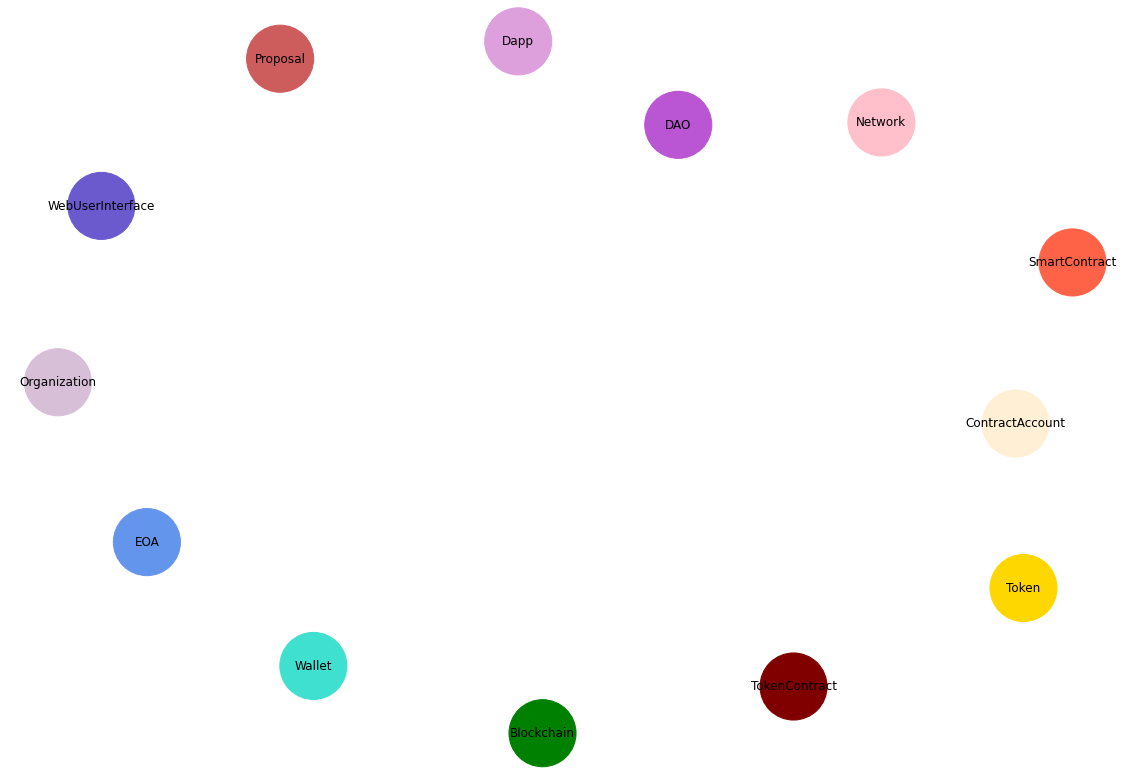

In [81]:
fig, ax = plt.subplots(figsize=(20,14))
daos_layout = nx.spring_layout(g_daos, 
                       k=3, iterations=50,
                       seed=2)
node_colors = []
for node in g_daos.nodes:
    node_colors.append(g_daos.nodes[node].get('color', 'olive'))
nx.draw(g_daos, 
        pos = daos_layout, 
        node_color = node_colors,
        node_size=4500,
        with_labels=True
       )
plt.show()

In [82]:
# Assign shape according to the node category.
g_daos.nodes["Blockchain"]['shape'] = 'P'
g_daos.nodes["ContractAccount"]['shape'] = 's'
g_daos.nodes["DAO"]['shape'] = 'o'
g_daos.nodes["Dapp"]['shape'] = 'o'
g_daos.nodes["EOA"]['shape'] = 's'
g_daos.nodes["Network"]['shape'] = 'P'
g_daos.nodes["Organization"]['shape'] = '8'
g_daos.nodes["Proposal"]['shape'] = 'd'
g_daos.nodes["SmartContract"]['shape'] = 'h'
g_daos.nodes["Token"]['shape'] = '*'
g_daos.nodes["TokenContract"]['shape'] = 'h'
g_daos.nodes["Wallet"]['shape'] = 'd'
g_daos.nodes["WebUserInterface"]['shape'] = 'p'

In [83]:
node_shapes = set((node[1]['shape'] for node in g_daos.nodes(data=True)))
node_shapes

{'*', '8', 'P', 'd', 'h', 'o', 'p', 's'}

In [84]:
color_dictionary_shape = {'*': 'gold', '8': 'thistle', 
                          'd':'olive', 'h': 'tomato',
                          'o':'mediumorchid', 'p':'slateblue',
                          's':'teal', 'P':'green' 
                         }
color_dictionary_shape

{'*': 'gold',
 '8': 'thistle',
 'd': 'olive',
 'h': 'tomato',
 'o': 'mediumorchid',
 'p': 'slateblue',
 's': 'teal',
 'P': 'green'}

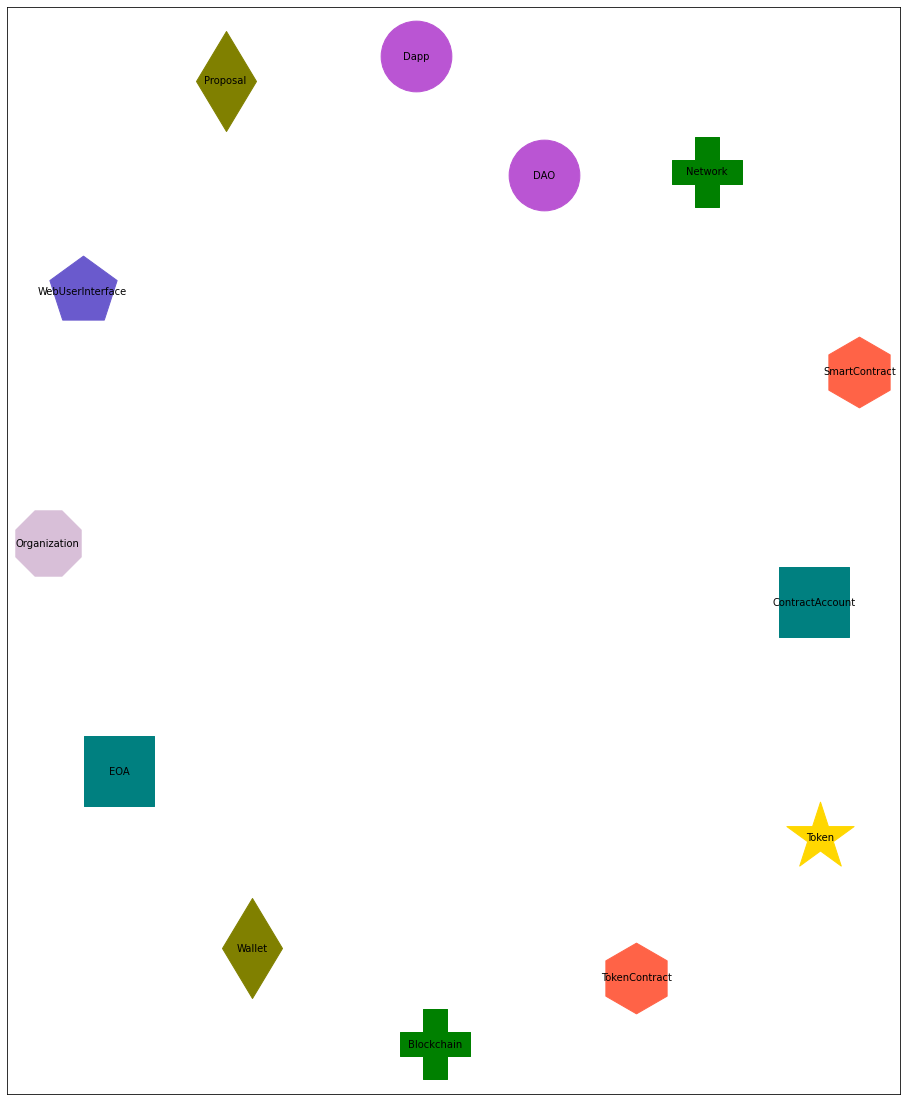

In [85]:
fig, ax = plt.subplots(figsize=(16,20))
daos_layout = nx.spring_layout(g_daos, 
                       k=3, iterations=50,
                       seed=2)
for shape in node_shapes:
    nx.draw_networkx_nodes(g_daos,
                           pos=daos_layout,
                           node_color = (color_dictionary_shape[shape] 
                                         if shape in color_dictionary_shape.keys() else 'olive'),
                           node_shape = shape,
                           node_size = 5000,
                           nodelist = [node[0] for node in g_daos.nodes(data=True) 
                                       if node[1]['shape'] == shape])
nx.draw_networkx_labels(g_daos, pos=daos_layout, font_size='10')
plt.show()

### 3.2. Edges

In [86]:
dao_edges = [{"source":"Blockchain", "relation_type":"has_parent", "target":"Blockchain"},
             {"source":"Network", "relation_type":"is_part_of", "target":"Blockchain"},
             {"source":"Network", "relation_type":"stores", "target":"SmartContract"},             
             {"source":"Dapp", "relation_type":"has", "target":"WebUserInterface"},
             {"source":"Dapp", "relation_type":"built_on", "target":"SmartContract"},
             {"source":"SmartContract", "relation_type":"is_associated_with", "target":"ContractAccount"},
             {"source":"SmartContract", "relation_type":"uses_auxiliary_contract", "target":"SmartContract"},
             {"source":"SmartContract", "relation_type":"deployed_on", "target":"Network"},
             {"source":"TokenContract", "relation_type":"is_a", "target":"SmartContract"},
             {"source":"DAO", "relation_type":"is_a", "target":"Dapp"},
             {"source":"DAO", "relation_type":"is_a", "target":"Organization"},
             {"source":"DAO", "relation_type":"composed_of", "target":"Dapp"},
             {"source":"DAO", "relation_type":"interacts", "target":"DAO"},
             {"source":"DAO", "relation_type":"operates", "target":"EOA"},
             {"source":"DAO", "relation_type":"owns", "target":"Token"},
             {"source":"DAO", "relation_type":"shares", "target":"Wallet"},
             {"source":"DAO", "relation_type":"receives", "target":"Proposal"},
             {"source":"Token", "relation_type":"managed_by", "target":"Wallet"},
             {"source":"Token", "relation_type":"implemented_by", "target":"TokenContract"},
             {"source":"EOA", "relation_type":"creates", "target":"Proposal"},
             {"source":"EOA", "relation_type":"is_responsible_of", "target":"Proposal"},
             {"source":"EOA", "relation_type":"is_part_of", "target":"Wallet"},
             {"source":"Proposal", "relation_type":"has_responsible_member", "target":"EOA"},
             {"source":"EOA", "relation_type":"votes", "target":"Proposal"},
             {"source":"Wallet", "relation_type":"is_gateway_to", "target":"Blockchain"}
            ]

In [87]:
dao_edges_df = pd.DataFrame(dao_edges)
dao_edges_df

,source,relation_type,target
0,Blockchain,has_parent,Blockchain
1,Network,is_part_of,Blockchain
2,Network,stores,SmartContract
3,Dapp,has,WebUserInterface
4,Dapp,built_on,SmartContract
5,SmartContract,is_associated_with,ContractAccount
6,SmartContract,uses_auxiliary_contract,SmartContract
7,SmartContract,deployed_on,Network
8,TokenContract,is_a,SmartContract
9,DAO,is_a,Dapp


In [88]:
g_dao_edges = nx.from_pandas_edgelist(dao_edges_df, 'source', 'target', 
                                     edge_attr='relation_type',
                                     create_using=nx.DiGraph())

In [89]:
g_daos = nx.compose(g_daos, g_dao_edges)

### 3.3. Knowledge Graph of node concepts

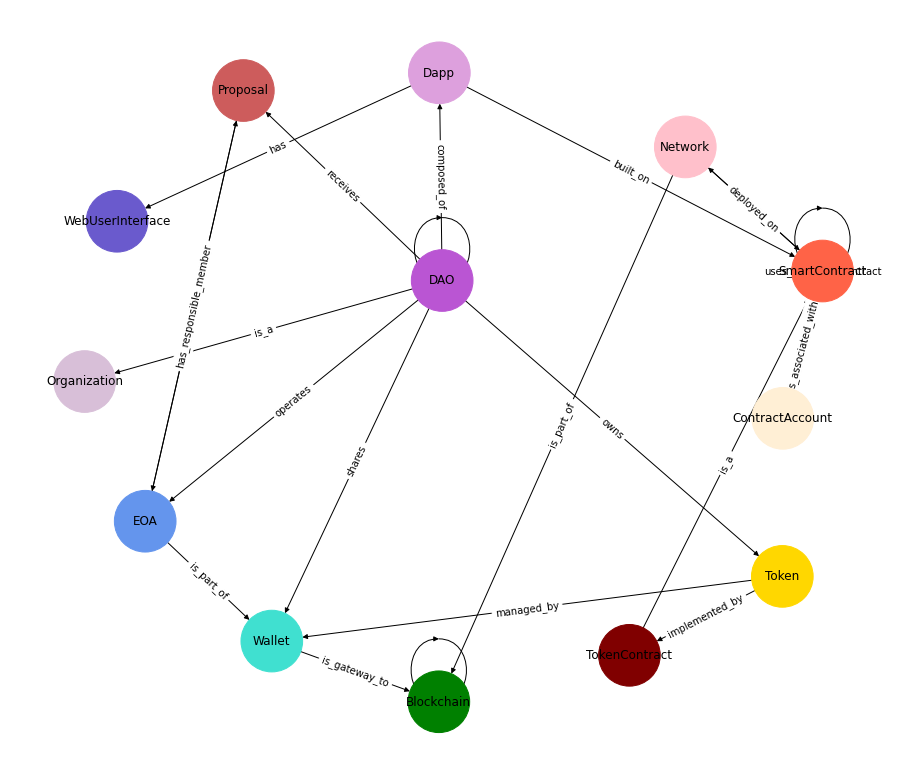

In [90]:
g_daos_length=nx.Graph(g_daos)
for (u,v,d) in g_daos.edges(data=True):
    g_daos_length.add_edge(u,v,len=str(len(d['relation_type'])))

fig, ax = plt.subplots(figsize=(16,14))
daos_layout = nx.spring_layout(g_daos, 
                       k=2.7, iterations=50,
                       seed=2)
node_colors = []
for node in g_daos.nodes:
    node_colors.append(g_daos.nodes[node].get('color', 'olive'))
nx.draw(g_daos, 
        pos = daos_layout, 
        node_color = node_colors,
        node_size=3800,
        with_labels=True
       )

labels = nx.get_edge_attributes(g_daos,'relation_type')
nx.draw_networkx_edge_labels(g_daos,
                             pos = daos_layout,
                             edge_labels=labels)
plt.show()

### 3.4. Definition of concept attributes

In [91]:
mdg_daos = nx.MultiDiGraph()

In [92]:
dao_nodes = ["Blockchain", "ContractAccount", "DAO", "Dapp",
             "EOA", "Network", "Organization", "Proposal", 
             "SmartContract", "Token", "TokenContract",
             "Wallet", "WebUserInterface"]

In [93]:
for item in dao_nodes:
    mdg_daos.add_node(item)

In [94]:
# Assign a color to each node.
mdg_daos.nodes["Blockchain"]['color'] = 'green'
mdg_daos.nodes["ContractAccount"]['color'] = 'papayawhip'
mdg_daos.nodes["DAO"]['color'] = 'mediumorchid'
mdg_daos.nodes["Dapp"]['color'] = 'plum'
mdg_daos.nodes["EOA"]['color'] = 'cornflowerblue'
mdg_daos.nodes["Network"]['color'] = 'pink'
mdg_daos.nodes["Organization"]['color'] = 'thistle'
mdg_daos.nodes["Proposal"]['color'] = 'indianred'
mdg_daos.nodes["SmartContract"]['color'] = 'tomato'
mdg_daos.nodes["Token"]['color'] = 'gold'
mdg_daos.nodes["TokenContract"]['color'] = 'maroon'
mdg_daos.nodes["Wallet"]['color'] = 'turquoise'
mdg_daos.nodes["WebUserInterface"]['color'] = 'slateblue'

In [95]:
list(mdg_daos.nodes(data=True))

[('Blockchain', {'color': 'green'}),
 ('ContractAccount', {'color': 'papayawhip'}),
 ('DAO', {'color': 'mediumorchid'}),
 ('Dapp', {'color': 'plum'}),
 ('EOA', {'color': 'cornflowerblue'}),
 ('Network', {'color': 'pink'}),
 ('Organization', {'color': 'thistle'}),
 ('Proposal', {'color': 'indianred'}),
 ('SmartContract', {'color': 'tomato'}),
 ('Token', {'color': 'gold'}),
 ('TokenContract', {'color': 'maroon'}),
 ('Wallet', {'color': 'turquoise'}),
 ('WebUserInterface', {'color': 'slateblue'})]

#### 3.4.1. Blockchain attributes

In [96]:
attr_blockchain = [{"source":"Blockchain", "attribute":"id", "target":"string", "rad":0.1},
                   {"source":"Blockchain", "attribute":"name", "target":"string", "rad":0.2},
                   {"source":"Blockchain", "attribute":"parent_blockchain", "target":"Blockchain", "rad":0.3}
                  ]

In [97]:
attr_blockchain_df = pd.DataFrame(attr_blockchain)
attr_blockchain_df

,source,attribute,target,rad
0,Blockchain,id,string,0.1
1,Blockchain,name,string,0.2
2,Blockchain,parent_blockchain,Blockchain,0.3


In [98]:
mdg_blockchain = nx.from_pandas_edgelist(attr_blockchain_df, 'source','target', 
                                       edge_attr=['attribute', 'rad'],
                                       create_using=nx.MultiDiGraph())

In [99]:
mdg_daos = nx.compose(mdg_daos, mdg_blockchain)

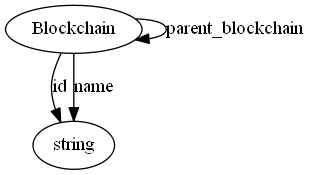

In [100]:
for edge in mdg_blockchain.edges(data=True): edge[2]['label'] = edge[2]['attribute']
node_label = nx.get_node_attributes(mdg_blockchain,'id')
pos = nx.spring_layout(mdg_blockchain)
node_label = nx.get_node_attributes(mdg_blockchain,'id')
pos = nx.spring_layout(mdg_blockchain)
p=nx.drawing.nx_pydot.to_pydot(mdg_blockchain)
p.write_png('./graphs/daos_blockchain.png')
Image(filename='./graphs/daos_blockchain.png')

#### 3.4.2. DAO attributes

In [101]:
attr_dao = [{"source":"DAO", "attribute":"id", "target":"integer", "rad":0.1 },
            {"source":"DAO", "attribute":"dao_address", "target":"SmartContract", "rad":0.2},
            {"source":"DAO", "attribute":"name", "target":"string", "rad":0.3},
            {"source":"DAO", "attribute":"created_at", "target":"date", "rad":0.4}
           ]

In [102]:
attr_dao_df = pd.DataFrame(attr_dao)
attr_dao_df

,source,attribute,target,rad
0,DAO,id,integer,0.1
1,DAO,dao_address,SmartContract,0.2
2,DAO,name,string,0.3
3,DAO,created_at,date,0.4


In [103]:
mdg_dao = nx.from_pandas_edgelist(attr_dao_df, 'source','target', 
                                       edge_attr=['attribute', 'rad'],
                                       create_using=nx.MultiDiGraph())
mdg_daos = nx.compose(mdg_daos, mdg_dao)

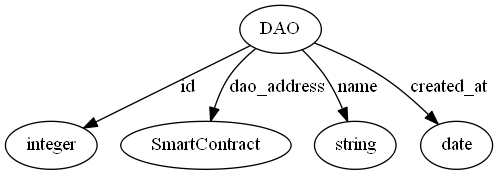

In [104]:
for edge in mdg_dao.edges(data=True): edge[2]['label'] = edge[2]['attribute']
node_label = nx.get_node_attributes(mdg_dao,'id')
pos = nx.spring_layout(mdg_dao)
node_label = nx.get_node_attributes(mdg_dao,'id')
pos = nx.spring_layout(mdg_dao)
p=nx.drawing.nx_pydot.to_pydot(mdg_dao)
p.write_png('./graphs/daos_dao.png')
Image(filename='./graphs/daos_dao.png')

#### 3.4.3. EOA attributes

In [105]:
attr_eoa = [{"source":"EOA", "attribute":"address", "target":"string", "rad":0.1}  
           ]

In [106]:
attr_eoa_df = pd.DataFrame(attr_eoa)
attr_eoa_df

,source,attribute,target,rad
0,EOA,address,string,0.1


In [107]:
mdg_eoa = nx.from_pandas_edgelist(attr_eoa_df, 'source','target', 
                                       edge_attr=['attribute', 'rad'],
                                       create_using=nx.MultiDiGraph())
mdg_daos = nx.compose(mdg_daos, mdg_eoa)

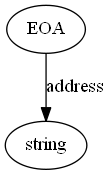

In [108]:
for edge in mdg_eoa.edges(data=True): edge[2]['label'] = edge[2]['attribute']
node_label = nx.get_node_attributes(mdg_eoa,'id')
pos = nx.spring_layout(mdg_eoa)
node_label = nx.get_node_attributes(mdg_eoa,'id')
pos = nx.spring_layout(mdg_eoa)
p=nx.drawing.nx_pydot.to_pydot(mdg_eoa)
p.write_png('./graphs/daos_eoa.png')
Image(filename='./graphs/daos_eoa.png')

#### 3.4.4. Network attributes

In [109]:
attr_network = [{"source":"Network", "attribute":"depends_on", "target":"Blockchain", "rad":0.1},
                {"source":"Network", "attribute":"id", "target":"string", "rad":0.2},
                {"source":"Network", "attribute":"name", "target":"string", "rad":0.3}                
               ]

In [110]:
attr_network_df = pd.DataFrame(attr_network)
attr_network_df

,source,attribute,target,rad
0,Network,depends_on,Blockchain,0.1
1,Network,id,string,0.2
2,Network,name,string,0.3


In [111]:
mdg_network = nx.from_pandas_edgelist(attr_network_df, 'source','target', 
                                       edge_attr=['attribute', 'rad'],
                                       create_using=nx.MultiDiGraph())
mdg_daos = nx.compose(mdg_daos, mdg_network)

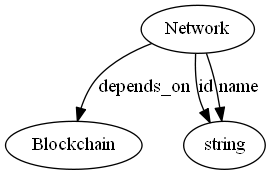

In [112]:
for edge in mdg_network.edges(data=True): edge[2]['label'] = edge[2]['attribute']
node_label = nx.get_node_attributes(mdg_network,'id')
pos = nx.spring_layout(mdg_network)
node_label = nx.get_node_attributes(mdg_network,'id')
pos = nx.spring_layout(mdg_network)
p=nx.drawing.nx_pydot.to_pydot(mdg_network)
p.write_png('./graphs/daos_network.png')
Image(filename='./graphs/daos_network.png')

#### 3.4.5. Proposal attributes

In [113]:
attr_proposal = [{"source":"Proposal", "attribute":"id", "target":"string", "rad":0.1},
                 {"source":"Proposal", "attribute":"proposer_address", "target":"EOA", "rad":0.2},
                 {"source":"Proposal", "attribute":"responsible_address", "target":"EOA", "rad":0.3},
                 {"source":"Proposal", "attribute":"created_at", "target":"date", "rad":0.4},
                 {"source":"Proposal", "attribute":"processed", "target":"boolean", "rad":0.5},
                 {"source":"Proposal", "attribute":"processed_at", "target":"date", "rad":0.6},
                 {"source":"Proposal", "attribute":"approved", "target":"boolean", "rad":0.7},
                 {"source":"Proposal", "attribute":"dao_address", "target":"DAO", "rad":0.8}
              ]

In [114]:
attr_proposal_df = pd.DataFrame(attr_proposal)
attr_proposal_df

,source,attribute,target,rad
0,Proposal,id,string,0.1
1,Proposal,proposer_address,EOA,0.2
2,Proposal,responsible_address,EOA,0.3
3,Proposal,created_at,date,0.4
4,Proposal,processed,boolean,0.5
5,Proposal,processed_at,date,0.6
6,Proposal,approved,boolean,0.7
7,Proposal,dao_address,DAO,0.8


In [115]:
mdg_proposal = nx.from_pandas_edgelist(attr_proposal_df, 'source','target', 
                                       edge_attr=['attribute', 'rad'],
                                       create_using=nx.MultiDiGraph())
mdg_daos = nx.compose(mdg_daos, mdg_proposal)

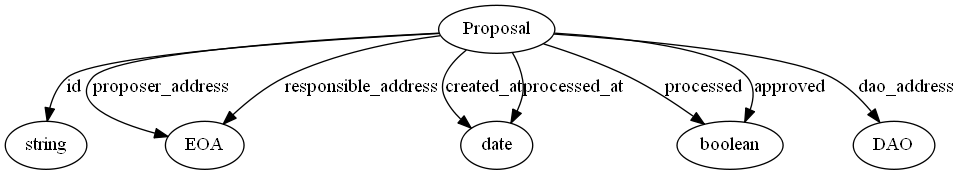

In [116]:
for edge in mdg_proposal.edges(data=True): edge[2]['label'] = edge[2]['attribute']
node_label = nx.get_node_attributes(mdg_proposal,'id')
pos = nx.spring_layout(mdg_proposal)
node_label = nx.get_node_attributes(mdg_proposal,'id')
pos = nx.spring_layout(mdg_proposal)
p=nx.drawing.nx_pydot.to_pydot(mdg_proposal)
p.write_png('./graphs/daos_proposal.png')
Image(filename='./graphs/daos_proposal.png')

#### 3.4.6. SmartContract attributes

In [117]:
attr_smart_contract = [{"source":"SmartContract", "attribute":"address", "target":"string", "rad":0.1},
                {"source":"SmartContract", "attribute":"deployed_on", "target":"Network", "rad":0.2}  
               ]

In [118]:
attr_smart_contract_df = pd.DataFrame(attr_smart_contract)
attr_smart_contract_df

,source,attribute,target,rad
0,SmartContract,address,string,0.1
1,SmartContract,deployed_on,Network,0.2


In [119]:
mdg_smart_contract = nx.from_pandas_edgelist(attr_smart_contract_df, 'source','target', 
                                       edge_attr=['attribute', 'rad'],
                                       create_using=nx.MultiDiGraph())
mdg_daos = nx.compose(mdg_daos, mdg_smart_contract)

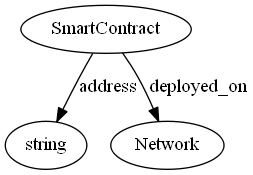

In [120]:
for edge in mdg_smart_contract.edges(data=True): edge[2]['label'] = edge[2]['attribute']
node_label = nx.get_node_attributes(mdg_smart_contract,'id')
pos = nx.spring_layout(mdg_smart_contract)
node_label = nx.get_node_attributes(mdg_smart_contract,'id')
pos = nx.spring_layout(mdg_smart_contract)
p=nx.drawing.nx_pydot.to_pydot(mdg_smart_contract)
p.write_png('./graphs/daos_smart_contract.png')
Image(filename='./graphs/daos_smart_contract.png')

#### 3.4.7. Token attributes

In [121]:
attr_token = [{"source":"Token", "attribute":"id", "target":"integer", "rad":0.1},
              {"source":"Token", "attribute":"token_address", "target":"string", "rad":0.2},
              {"source":"Token", "attribute":"symbol", "target":"string", "rad":0.3},
              {"source":"Token", "attribute":"usd_value", "target":"float", "rad":0.4},
              {"source":"Token", "attribute":"dao_address", "target":"SmartContract", "rad":0.5}
             ]

In [122]:
attr_token_df = pd.DataFrame(attr_token)
attr_token_df

,source,attribute,target,rad
0,Token,id,integer,0.1
1,Token,token_address,string,0.2
2,Token,symbol,string,0.3
3,Token,usd_value,float,0.4
4,Token,dao_address,SmartContract,0.5


In [123]:
mdg_token = nx.from_pandas_edgelist(attr_token_df, 'source','target', 
                                       edge_attr=['attribute', 'rad'],
                                       create_using=nx.MultiDiGraph())
mdg_daos = nx.compose(mdg_daos, mdg_token)

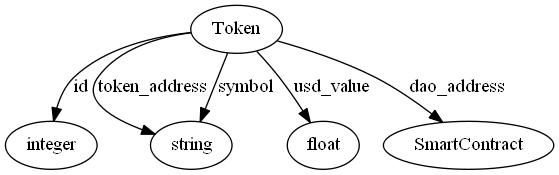

In [124]:
for edge in mdg_token.edges(data=True): edge[2]['label'] = edge[2]['attribute']
node_label = nx.get_node_attributes(mdg_token,'id')
pos = nx.spring_layout(mdg_token)
node_label = nx.get_node_attributes(mdg_token,'id')
pos = nx.spring_layout(mdg_token)
p=nx.drawing.nx_pydot.to_pydot(mdg_token)
p.write_png('./graphs/daos_token.png')
Image(filename='./graphs/daos_token.png')

#### 3.4.8. Wallet attributes

In [125]:
attr_wallet = [{"source":"Wallet", "attribute":"id", "target":"string", "rad":0.1},
               {"source":"Wallet", "attribute":"name", "target":"string", "rad":0.2},
               {"source":"Wallet", "attribute":"url", "target":"string", "rad":0.3}
              ]

In [126]:
attr_wallet_df = pd.DataFrame(attr_wallet)
attr_wallet_df

,source,attribute,target,rad
0,Wallet,id,string,0.1
1,Wallet,name,string,0.2
2,Wallet,url,string,0.3


In [127]:
mdg_wallet = nx.from_pandas_edgelist(attr_wallet_df, 'source','target', 
                                       edge_attr=['attribute', 'rad'],
                                       create_using=nx.MultiDiGraph())
mdg_daos = nx.compose(mdg_daos, mdg_wallet)

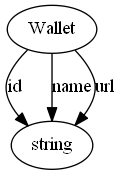

In [128]:
for edge in mdg_wallet.edges(data=True): edge[2]['label'] = edge[2]['attribute']
node_label = nx.get_node_attributes(mdg_wallet,'id')
pos = nx.spring_layout(mdg_wallet)
node_label = nx.get_node_attributes(mdg_wallet,'id')
pos = nx.spring_layout(mdg_wallet)
p=nx.drawing.nx_pydot.to_pydot(mdg_wallet)
p.write_png('./graphs/wallets.png')
Image(filename='./graphs/wallets.png')

### 3.5. Knowledge Graph of node concepts and attributes

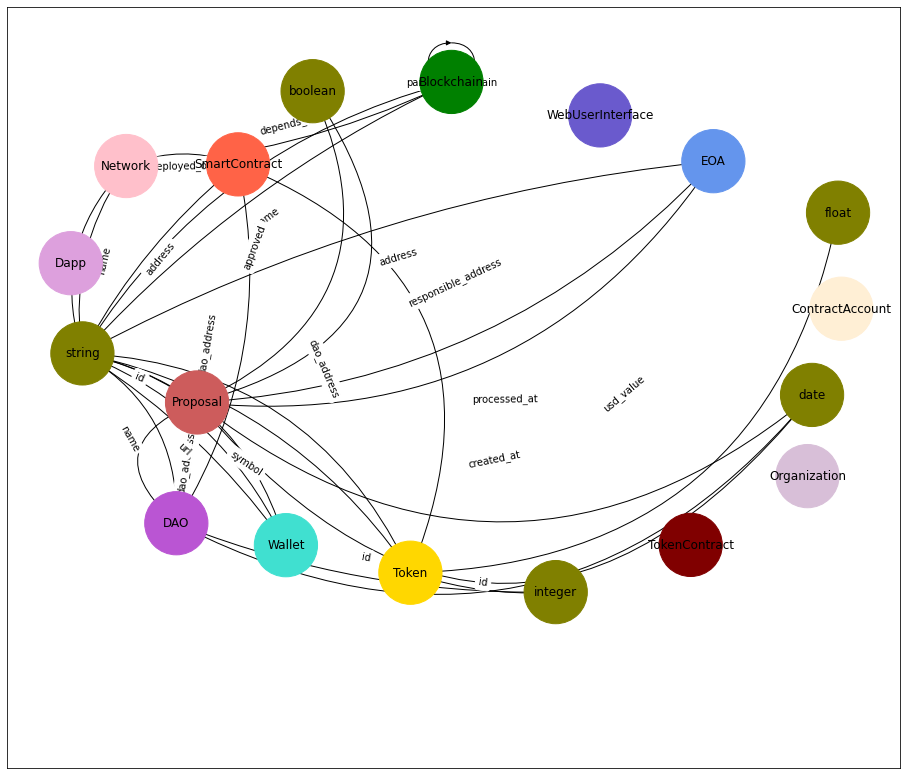

In [129]:
fig, ax = plt.subplots(figsize=(16,14))
daos_layout = nx.spring_layout(mdg_daos, 
                       k=3, iterations=50,
                       seed=42)
node_colors = []
for node in mdg_daos.nodes:
    node_colors.append(mdg_daos.nodes[node].get('color', 'olive'))
nx.draw_networkx_nodes(mdg_daos, 
                       pos=daos_layout,
                       node_size=4000,
                       node_color = node_colors
                      )
nx.draw_networkx_labels(mdg_daos, pos=daos_layout)
for edge in mdg_daos.edges(data=True):
    nx.draw_networkx_edges(mdg_daos, pos=daos_layout, edgelist=[(edge[0],edge[1])], 
                           connectionstyle=f'arc3, rad = {edge[2]["rad"]}')
labels=dict([((u,v,),d['attribute'])
             for u,v,d in mdg_daos.edges(data=True)])
nx.draw_networkx_edge_labels(mdg_daos,
                             pos = daos_layout,
                             edge_labels=labels
                            )
plt.show()

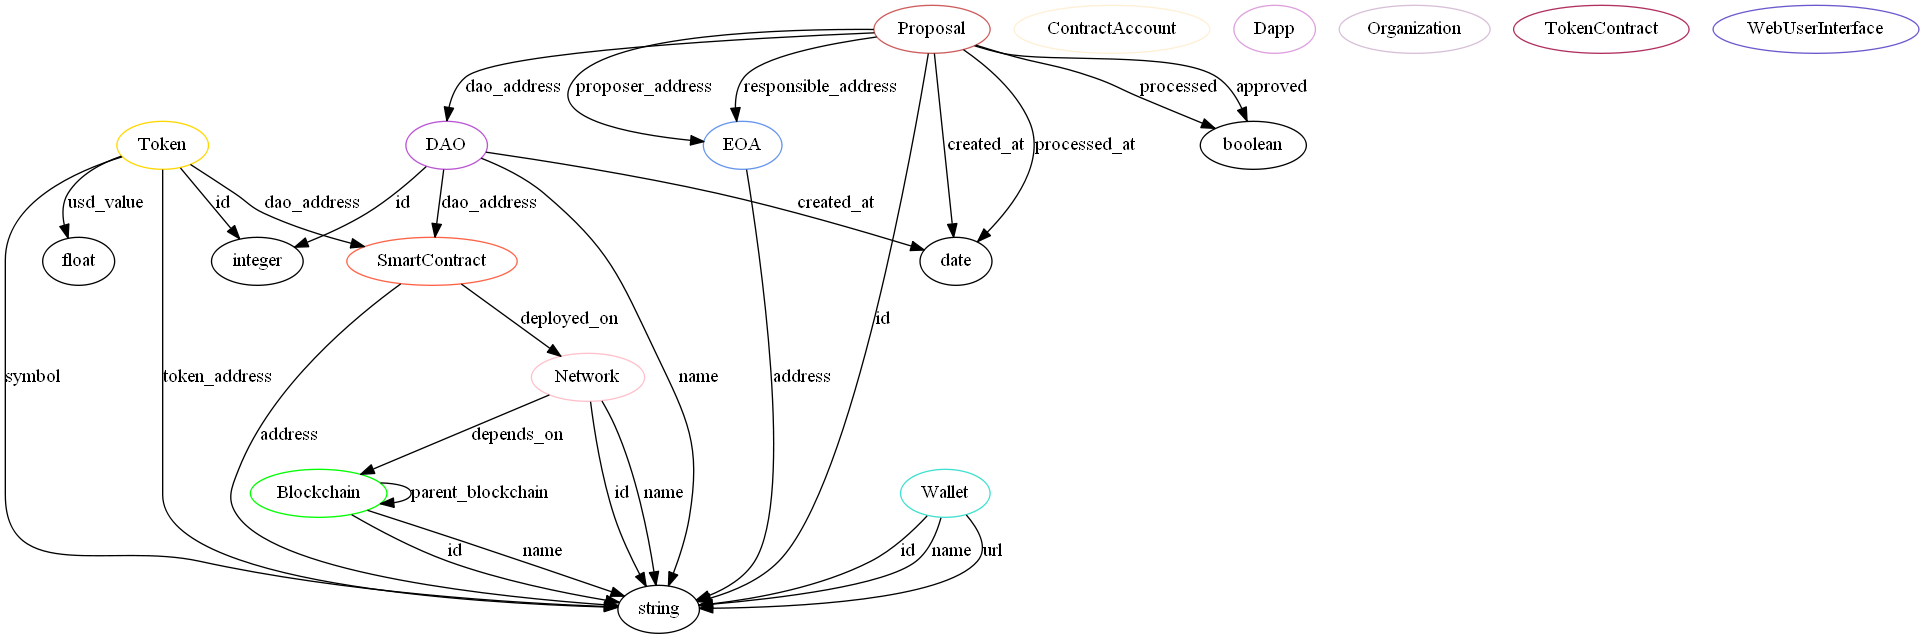

In [130]:
for edge in mdg_daos.edges(data=True): edge[2]['label'] = edge[2]['attribute']
node_label = nx.get_node_attributes(mdg_daos,'id')
pos = nx.spring_layout(mdg_daos)
node_label = nx.get_node_attributes(mdg_daos,'id')
pos = nx.spring_layout(mdg_daos)
p=nx.drawing.nx_pydot.to_pydot(mdg_daos)
p.write_png('./graphs/daos.png')
Image(filename='./graphs/daos.png')

### 3.6. Management of instances

In [131]:
def get_node_from_graph(node_id, graph):
    return [node for node in graph.nodes() 
            if node == node_id]

In [132]:
dg_daos = nx.DiGraph()

In [133]:
dao_nodes = ["EOA", "Proposal", "SmartContract"]

In [134]:
for item in dao_nodes:
    dg_daos.add_node(item)

In [135]:
# Assign a color to each node.
dg_daos.nodes["EOA"]['color'] = 'cornflowerblue'
dg_daos.nodes["Proposal"]['color'] = 'indianred'
dg_daos.nodes["SmartContract"]['color'] = 'tomato'

#### Example: Proposals

In [136]:
# To illustrates an example, only select the proposals of DAO with the next address:
dao_proposals_sample_df = dao_proposals_df[dao_proposals_df["daoAddress"] == '0x751eda5aa0a1c026f51942e266ed82795428ae34']
# Only three rows
dao_proposals_sample_df = dao_proposals_sample_df.iloc[:3]
dao_proposals_sample_df.reset_index(inplace =True, drop = True)
dao_proposals_sample_df.head(10)

,proposalId,proposalCode,proposer,responsibleMember,daoAddress,paymentRequested,processed,processedAt,yesVotes,noVotes,didPass,createdAt
0,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x0000000000000000000000000000000000000000,0x751eda5aa0a1c026f51942e266ed82795428ae34,0,False,NaT,0,0,False,2021-11-02 21:51:58
1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,1,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x751eda5aa0a1c026f51942e266ed82795428ae34,0,True,2021-12-01 01:45:51,2,1,True,2021-11-12 17:40:35
2,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,2,0xd73da7851d9571668752bee97fd6aa6656abba26,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,0x751eda5aa0a1c026f51942e266ed82795428ae34,0,True,2021-12-08 17:14:53,1,0,True,2021-11-28 01:01:50


In [137]:
dao_proposals_sample_df.shape

(3, 12)

In [138]:
# proposer
proposal_instances_df = dao_proposals_sample_df[["proposalCode", "proposer"]]
proposal_instances_df.rename(columns = {'proposer':'proposal_attr'}, inplace = True)
proposal_instances_df["attr_relation"] = "proposer"
proposal_instances_df

,proposalCode,proposal_attr,attr_relation
0,0,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,proposer
1,1,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,proposer
2,2,0xd73da7851d9571668752bee97fd6aa6656abba26,proposer


In [139]:
proposal_instances_df.rename(columns = {'proposer':'proposal_attr'}, inplace = True)
proposal_instances_df["attr_relation"] = "proposer"
proposal_instances_df

,proposalCode,proposal_attr,attr_relation
0,0,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,proposer
1,1,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,proposer
2,2,0xd73da7851d9571668752bee97fd6aa6656abba26,proposer


In [140]:
# responsibleMember
# When the value is equals to 0x0000000000000000000000000000000000000000
# this is due to the proposer is a member of the DAO and it is considered
# the responsible of the proposal. Sometimes is a member, but the responsible
# could be the same or another member.
proposal_responsible_instances_df = dao_proposals_sample_df[["proposalCode", "responsibleMember"]]
proposal_responsible_instances_df.rename(columns = {'responsibleMember':'proposal_attr'}, inplace = True)
proposal_responsible_instances_df["attr_relation"] = "responsible_member"
proposal_instances_df = pd.concat([proposal_instances_df, proposal_responsible_instances_df])
proposal_instances_df.reset_index(inplace =True, drop = True)
proposal_instances_df

,proposalCode,proposal_attr,attr_relation
0,0,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,proposer
1,1,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,proposer
2,2,0xd73da7851d9571668752bee97fd6aa6656abba26,proposer
3,0,0x0000000000000000000000000000000000000000,responsible_member
4,1,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,responsible_member
5,2,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,responsible_member


In [141]:
# daoAddress
proposal_address_instances_df = dao_proposals_sample_df[["proposalCode", "daoAddress"]]
proposal_address_instances_df.rename(columns = {'daoAddress':'proposal_attr'}, inplace = True)
proposal_address_instances_df["attr_relation"] = "dao_address"
proposal_instances_df = pd.concat([proposal_instances_df, proposal_address_instances_df])
proposal_instances_df.reset_index(inplace =True, drop = True)
proposal_instances_df

,proposalCode,proposal_attr,attr_relation
0,0,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,proposer
1,1,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,proposer
2,2,0xd73da7851d9571668752bee97fd6aa6656abba26,proposer
3,0,0x0000000000000000000000000000000000000000,responsible_member
4,1,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,responsible_member
5,2,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,responsible_member
6,0,0x751eda5aa0a1c026f51942e266ed82795428ae34,dao_address
7,1,0x751eda5aa0a1c026f51942e266ed82795428ae34,dao_address
8,2,0x751eda5aa0a1c026f51942e266ed82795428ae34,dao_address


In [142]:
# processed
proposal_processed_instances_df = dao_proposals_sample_df[["proposalCode", "processed"]]
proposal_processed_instances_df.rename(columns = {'processed':'proposal_attr'}, inplace = True)
proposal_processed_instances_df["attr_relation"] = "processed"
proposal_instances_df = pd.concat([proposal_instances_df, proposal_processed_instances_df])
proposal_instances_df.reset_index(inplace =True, drop = True)
proposal_instances_df

,proposalCode,proposal_attr,attr_relation
0,0,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,proposer
1,1,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,proposer
2,2,0xd73da7851d9571668752bee97fd6aa6656abba26,proposer
3,0,0x0000000000000000000000000000000000000000,responsible_member
4,1,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,responsible_member
5,2,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,responsible_member
6,0,0x751eda5aa0a1c026f51942e266ed82795428ae34,dao_address
7,1,0x751eda5aa0a1c026f51942e266ed82795428ae34,dao_address
8,2,0x751eda5aa0a1c026f51942e266ed82795428ae34,dao_address
9,0,False,processed


In [143]:
# didPass
proposal_did_pass_instances_df = dao_proposals_sample_df[["proposalCode", "didPass"]]
proposal_did_pass_instances_df.rename(columns = {'didPass':'proposal_attr'}, inplace = True)
proposal_did_pass_instances_df["attr_relation"] = "did_pass"
proposal_instances_df = pd.concat([proposal_instances_df, proposal_did_pass_instances_df])
proposal_instances_df.reset_index(inplace =True, drop = True)
proposal_instances_df

,proposalCode,proposal_attr,attr_relation
0,0,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,proposer
1,1,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,proposer
2,2,0xd73da7851d9571668752bee97fd6aa6656abba26,proposer
3,0,0x0000000000000000000000000000000000000000,responsible_member
4,1,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,responsible_member
5,2,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,responsible_member
6,0,0x751eda5aa0a1c026f51942e266ed82795428ae34,dao_address
7,1,0x751eda5aa0a1c026f51942e266ed82795428ae34,dao_address
8,2,0x751eda5aa0a1c026f51942e266ed82795428ae34,dao_address
9,0,False,processed


Since, proposer and responsibleMember are EOAs, we are going to define these relationships.

In [144]:
# proposer
proposal_proposer_df = dao_proposals_sample_df[["proposer"]]
proposal_proposer_df.drop_duplicates(inplace=True)
proposal_proposer_df.reset_index(drop=True, inplace=True)
proposal_proposer_df.rename(columns = {'proposer':'proposalCode'}, inplace = True)
proposal_proposer_df["proposal_attr"] = "EOA"
proposal_proposer_df["attr_relation"] = "type"
proposal_proposer_df

,proposalCode,proposal_attr,attr_relation
0,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,EOA,type
1,0xd73da7851d9571668752bee97fd6aa6656abba26,EOA,type


In [145]:
proposal_instances_df = pd.concat([proposal_instances_df, proposal_proposer_df])
proposal_instances_df

,proposalCode,proposal_attr,attr_relation
0,0,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,proposer
1,1,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,proposer
2,2,0xd73da7851d9571668752bee97fd6aa6656abba26,proposer
3,0,0x0000000000000000000000000000000000000000,responsible_member
4,1,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,responsible_member
5,2,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,responsible_member
6,0,0x751eda5aa0a1c026f51942e266ed82795428ae34,dao_address
7,1,0x751eda5aa0a1c026f51942e266ed82795428ae34,dao_address
8,2,0x751eda5aa0a1c026f51942e266ed82795428ae34,dao_address
9,0,False,processed


In [146]:
# isResponsibleMember
proposal_responsible_df = dao_proposals_sample_df[["responsibleMember"]]
proposal_responsible_df = proposal_responsible_df[proposal_responsible_df["responsibleMember"] != '0x0000000000000000000000000000000000000000']
proposal_responsible_df.drop_duplicates(inplace=True)
proposal_responsible_df.reset_index(drop=True, inplace=True)
proposal_responsible_df.rename(columns = {'responsibleMember':'proposalCode'}, inplace = True)
proposal_responsible_df["proposal_attr"] = "EOA"
proposal_responsible_df["attr_relation"] = "type"
proposal_instances_df = pd.concat([proposal_instances_df, proposal_responsible_df])
proposal_instances_df

,proposalCode,proposal_attr,attr_relation
0,0,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,proposer
1,1,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,proposer
2,2,0xd73da7851d9571668752bee97fd6aa6656abba26,proposer
3,0,0x0000000000000000000000000000000000000000,responsible_member
4,1,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,responsible_member
5,2,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,responsible_member
6,0,0x751eda5aa0a1c026f51942e266ed82795428ae34,dao_address
7,1,0x751eda5aa0a1c026f51942e266ed82795428ae34,dao_address
8,2,0x751eda5aa0a1c026f51942e266ed82795428ae34,dao_address
9,0,False,processed


Since daoAddress is a SmartContrat, we are going to define this relationship.

In [147]:
# isResponsibleMember
proposal_dao_df = dao_proposals_sample_df[["daoAddress"]]
proposal_dao_df.drop_duplicates(inplace=True)
proposal_dao_df.reset_index(drop=True, inplace=True)
proposal_dao_df.rename(columns = {'daoAddress':'proposalCode'}, inplace = True)
proposal_dao_df["proposal_attr"] = "SmartContract"
proposal_dao_df["attr_relation"] = "type"
proposal_instances_df = pd.concat([proposal_instances_df, proposal_dao_df])
proposal_instances_df

,proposalCode,proposal_attr,attr_relation
0,0,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,proposer
1,1,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,proposer
2,2,0xd73da7851d9571668752bee97fd6aa6656abba26,proposer
3,0,0x0000000000000000000000000000000000000000,responsible_member
4,1,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,responsible_member
5,2,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,responsible_member
6,0,0x751eda5aa0a1c026f51942e266ed82795428ae34,dao_address
7,1,0x751eda5aa0a1c026f51942e266ed82795428ae34,dao_address
8,2,0x751eda5aa0a1c026f51942e266ed82795428ae34,dao_address
9,0,False,processed


In [148]:
dg_proposal_instances = nx.from_pandas_edgelist(proposal_instances_df, 
                                                'proposalCode', 'proposal_attr', 
                                                edge_attr='attr_relation',
                                                create_using=nx.DiGraph())

In [149]:
# Set instance color.
for node in dg_proposal_instances.nodes(data=True):
    if node[0] != "EOA" and node[0] != "SmartContract":
        dg_proposal_instances.nodes[node[0]]['color'] = 'plum'

In [150]:
dg_daos_proposal_instances = nx.DiGraph(dg_daos)
dg_daos_proposal_instances = nx.compose(dg_daos_proposal_instances, dg_proposal_instances)

In [151]:
# Get the node "Proposal" from the graph.
node_proposal = get_node_from_graph("Proposal", dg_daos_proposal_instances)
node_proposal = node_proposal[0]
node_proposal

'Proposal'

In [152]:
for edge in dg_proposal_instances.edges(data=True):
    if dg_daos_proposal_instances[edge[0]][edge[1]]["attr_relation"] != "type":
        dg_daos_proposal_instances.add_edge(edge[0], node_proposal, attr_relation="type")

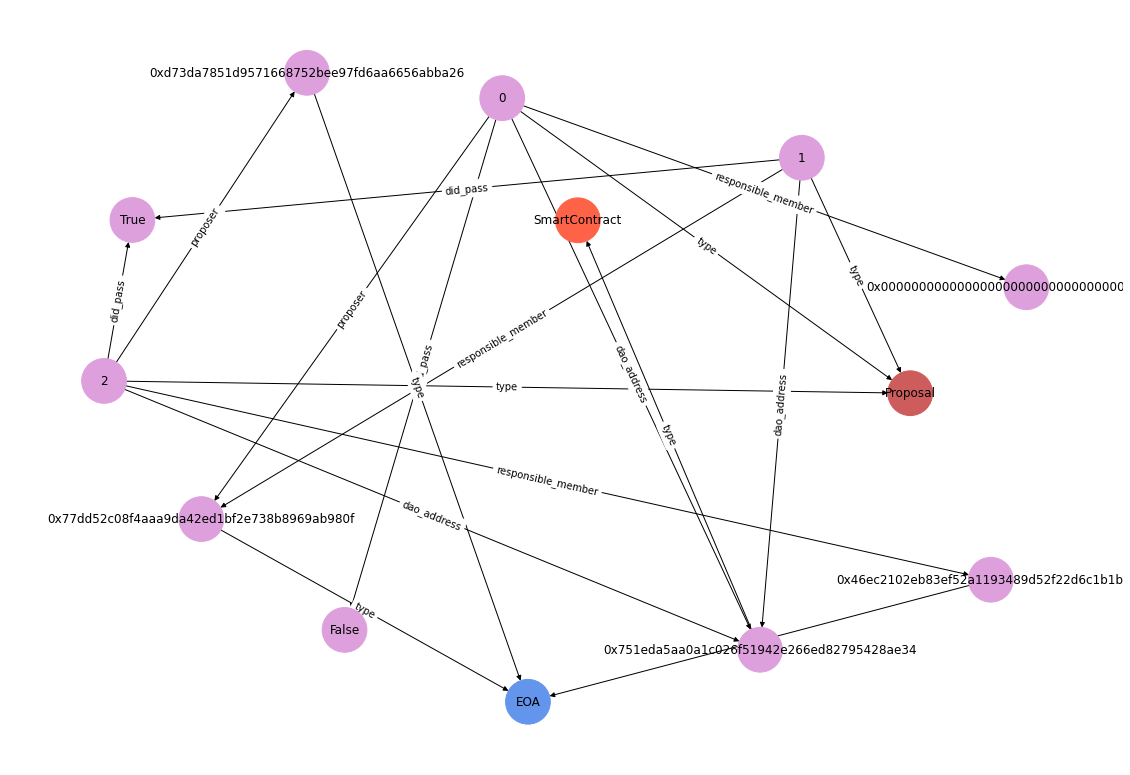

In [153]:
node_colors = []
for node, color in list(dg_daos_proposal_instances.nodes(data="color")):
        node_colors.append(color)
fig, ax = plt.subplots(figsize=(20,14))
daos_layout = nx.spring_layout(dg_daos_proposal_instances, 
                       k=2.7, iterations=20,
                       seed=2)
nx.draw(dg_daos_proposal_instances, 
        pos = daos_layout, 
        node_color = node_colors,
        node_size=2000,
        with_labels=True
       )
labels = nx.get_edge_attributes(dg_daos_proposal_instances,'attr_relation')
nx.draw_networkx_edge_labels(dg_daos_proposal_instances,
                             pos = daos_layout,
                             edge_labels=labels)
plt.show()

### 3.7. Knowledge Graph - Analysis

We can obtain the centrality degree in order to get the largest DAOs in the DAOhaus ecosystem based on the number of active members.

In [163]:
def extract_partition_nodes(graph, partition):
    nodeset = [n for n, d in graph.nodes(data=True) if d["bipartite"] == partition]
    if len(nodeset) == 0:
        return print(f"This partition doesn't have any node: {partition}")
    else:
        return nodeset

In [164]:
def find_most_member_dao(graph, dao_nodes, dao_list):
    dcs = (
        pd.Series(nx.bipartite.degree_centrality(graph, dao_nodes))
        .sort_values(ascending=False)
        .to_frame()
    )
    return dcs.reset_index().query(f'index.isin({dao_list})').iloc[0]["index"]

In [165]:
# Only active members.
active_members_df = dao_members_df[dao_members_df["isActive"] == True]
active_members_df.reset_index(inplace =True, drop = True)

In [166]:
# Members
bmembers_df = active_members_df[["memberAddress"]]
bmembers_df = bmembers_df.drop_duplicates()
bmembers_df.reset_index(inplace =True, drop = True)
bmembers = bmembers_df["memberAddress"].values.tolist()
len(bmembers)

9223

In [167]:
bmembers_df.head()

,memberAddress
0,0x54c375c481f95ba43e2cecd6ef30631f55518f57
1,0x15c560d2d9eb3af98524aa73becba43e9e6cef02
2,0x17fba501df40e83605d01fbef7f68174537e361a
3,0x85c0fea4a2a6de02a2d51108340cf4f08072d3ff
4,0xa3d7c306e182121e63cb5258b27e35f11f70c4e5


In [168]:
# DAOs
bdaos_df = active_members_df[["daoAddress"]]
bdaos_df = bdaos_df.drop_duplicates()
bdaos_df.reset_index(inplace =True, drop = True)
bdaos = bdaos_df["daoAddress"].values.tolist()
len(bdaos)

935

In [169]:
bdaos_df.head()

,daoAddress
0,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9
1,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265
2,0x47839e5373cd204f96d49d3a253c0433a2a5f038
3,0x751eda5aa0a1c026f51942e266ed82795428ae34
4,0xea9916a3e6a28eca1c551ee3e78737336068395e


In [170]:
from networkx.algorithms import bipartite
bdg_daos = nx.DiGraph()
bdg_daos.add_nodes_from(bmembers, bipartite='member')
bdg_daos.add_nodes_from(bdaos, bipartite='dao')

In [171]:
bipartite.is_bipartite(bdg_daos)

True

In [172]:
member_nodes = extract_partition_nodes(bdg_daos, "member")
member_nodes[0]

'0x54c375c481f95ba43e2cecd6ef30631f55518f57'

In [173]:
daos_nodes = extract_partition_nodes(bdg_daos, "dao")
daos_nodes[0]

'0xdff66a4afbc60097b65b4340f8cec33d7d0f0051'

In [174]:
member_daos_instances_df = active_members_df[["memberAddress", "daoAddress", "shares"]]
member_daos_instances_df.head(10)

,memberAddress,daoAddress,shares
0,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,500000
1,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,600
2,0x17fba501df40e83605d01fbef7f68174537e361a,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,600
3,0x85c0fea4a2a6de02a2d51108340cf4f08072d3ff,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,600
4,0xa3d7c306e182121e63cb5258b27e35f11f70c4e5,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,600
5,0xd7163f80bec05eb32b841fdbd02b8a57fb33ad7d,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,600
6,0x196e919f74baeafca10c313043848c39a8f5effd,0x47839e5373cd204f96d49d3a253c0433a2a5f038,1
7,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,0x751eda5aa0a1c026f51942e266ed82795428ae34,5000000
8,0x6fef3d3226e9da958cc66bcb513db55224e1f1ae,0x751eda5aa0a1c026f51942e266ed82795428ae34,0
9,0x77dd52c08f4aaa9da42ed1bf2e738b8969ab980f,0x751eda5aa0a1c026f51942e266ed82795428ae34,5000000


In [175]:
member_daos_instances_df.shape

(12670, 3)

In [176]:
dg_member_daos_instances = nx.from_pandas_edgelist(member_daos_instances_df, 
                                                  'memberAddress', 'daoAddress',
                                                   edge_attr='shares',
                                                   create_using=nx.DiGraph())

In [177]:
bdg_daos = nx.compose(bdg_daos, dg_member_daos_instances)

In [524]:
find_most_member_dao(bdg_daos, daos_nodes, bdaos)

'0x1b975a9daf25e7b01e0a6c72d657ff74925327a8'

In [178]:
# Ref.: https://app.daohaus.club/dao/0x64/0x1b975a9daf25e7b01e0a6c72d657ff74925327a8
daos_df[daos_df["daoAddress"] == '0x1b975a9daf25e7b01e0a6c72d657ff74925327a8']

,daoAddress,name,networkId,createdAt
438,0x1b975a9daf25e7b01e0a6c72d657ff74925327a8,DEAD FoundationsDAO,xdai,2020-11-25 00:10:45
